<div class="alert alert-block alert-info" style="font-size:16px">

# Supporting functions 


In [967]:
def outlier_detection(df, features):
    # Ensure features is always a list
    if isinstance(features, str):
        features = [features]

    # Loop through the features
    for feature in features:
        q3 = df[feature].quantile(0.75)
        q1 = df[feature].quantile(0.25)
        iqr = q3 - q1  # Interquartile Range

        # Detect moderate and extreme outliers
        mod_outl = df.loc[(abs(df[feature]) > 1.5 * iqr) & (abs(df[feature]) <= 3 * iqr)].shape[0]
        ext_outl = df.loc[abs(df[feature]) > 3 * iqr].shape[0]

        # Print the outlier counts
        print(f"{feature}: Number of extreme outliers: {ext_outl}, Number of moderate outliers: {mod_outl}")
        print(f"Total number of outliers: {mod_outl + ext_outl}\n")
        

<div class="alert alert-block alert-info" style="font-size:16px">

# 1. EDA 
## 1.1 Analyzing initial dataset

In [968]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
import math
import os
import scipy.stats as ss
import warnings




In [969]:
df = pd.read_csv("DM2425_ABCDEats_DATASET.csv")

In [970]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [971]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [972]:
df.shape[0]

31888

In [973]:
df.describe(include=[np.number], percentiles=np.arange(0.1,1,0.1))

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,20.000000,1.000000,1.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,22.000000,1.000000,2.000000,1.000000,6.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,23.000000,2.000000,2.000000,1.000000,10.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40%,25.000000,2.000000,3.000000,1.000000,16.000000,64.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60%,28.000000,3.000000,4.000000,2.000000,30.000000,76.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [974]:
"""Set customer_id index as the index """
df.set_index('customer_id')

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


In [975]:
"""Dropping duplicated values"""
df.drop_duplicates(inplace=True)

In [976]:
"""Checking number of NA Values"""
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

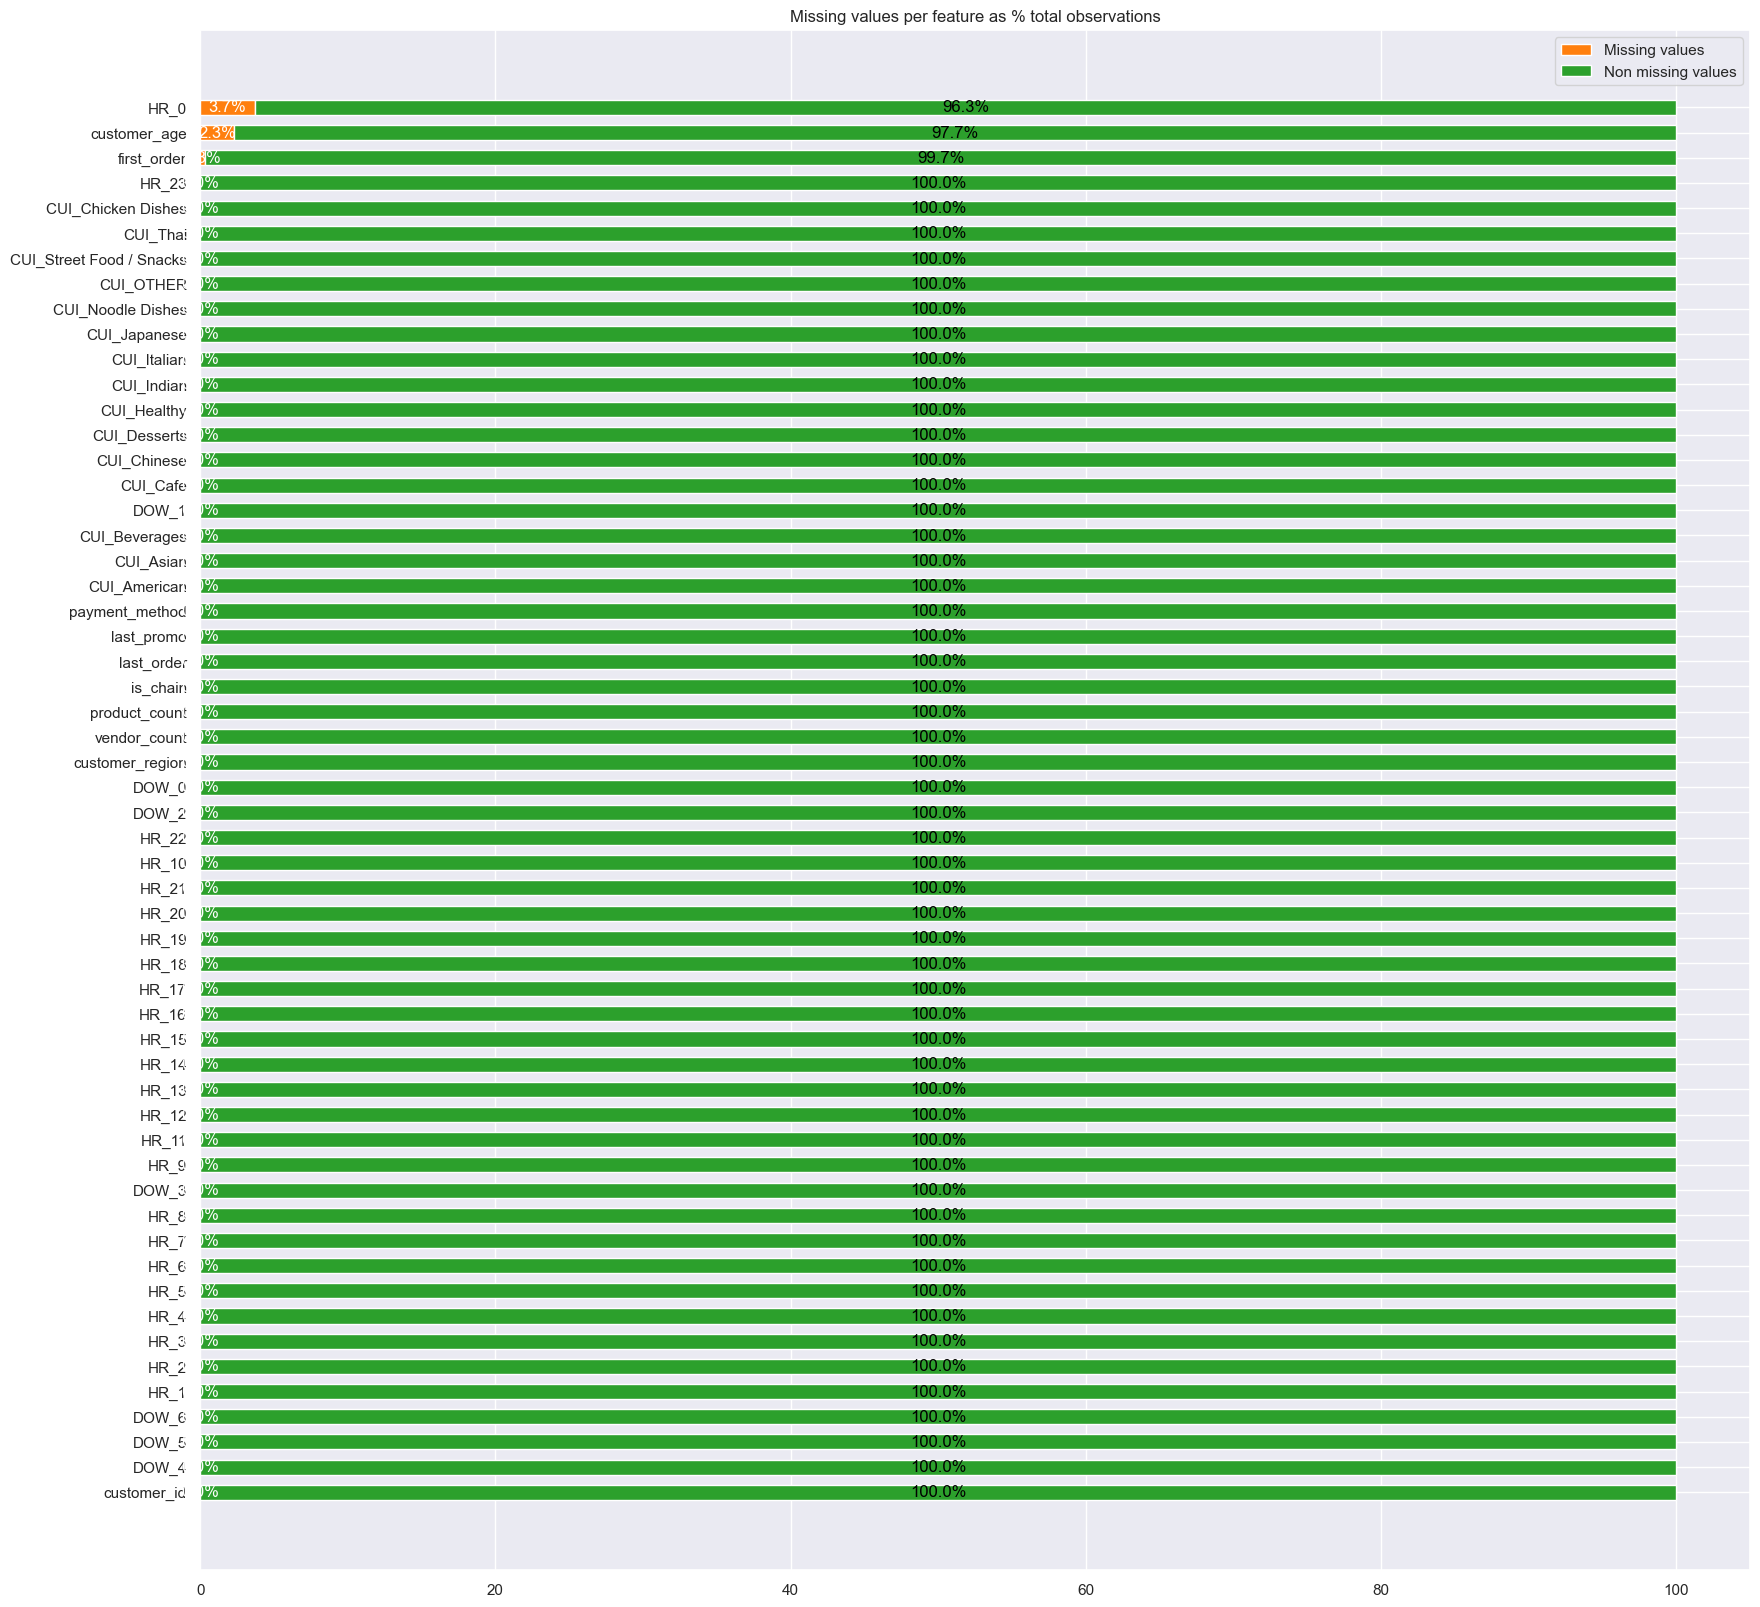

In [977]:
"""NaN values for each column as % total obervations"""
percentage_missing = round((df.isnull().sum() / df.shape[0])*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations")
plt.show()


<div class="alert alert-block alert-info" style="font-size:16px">

## 1.1 Individual feature analysis

### **`First_order`**

In [978]:
"""Understanding the feature"""
df["first_order"].info()

<class 'pandas.core.series.Series'>
Index: 31875 entries, 0 to 31887
Series name: first_order
Non-Null Count  Dtype  
--------------  -----  
31769 non-null  float64
dtypes: float64(1)
memory usage: 498.0 KB


In [979]:
"""Undestanding the statistical properties"""
df["first_order"].describe(percentiles= np.arange(0.1,1,0.05))

count    31769.000000
mean        28.469924
std         24.104626
min          0.000000
10%          2.000000
15%          4.000000
20%          6.000000
25%          7.000000
30%         10.000000
35%         13.000000
40%         16.000000
45%         19.000000
50%         22.000000
50%         22.000000
55%         26.000000
60%         30.000000
65%         34.000000
70%         39.000000
75%         45.000000
80%         51.000000
85%         58.000000
90%         67.000000
95%         77.000000
max         90.000000
Name: first_order, dtype: float64

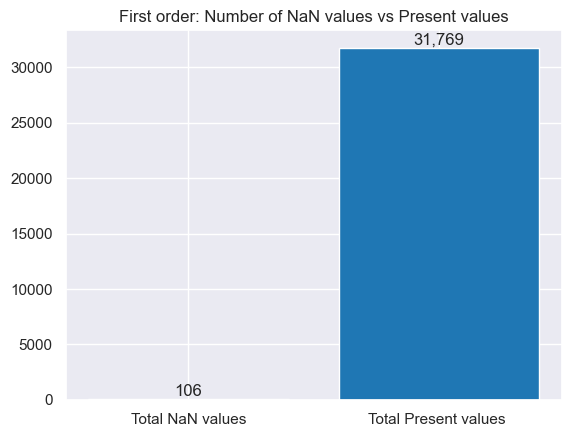

In [980]:
"""Number of NaN values vs Non missing values"""
total_elements = len(df["first_order"])
fo_perc_na_values = df["first_order"].isna().sum()
fo_per_present_values = total_elements- fo_perc_na_values

fig, ax = plt.subplots()
x_values = ["Total NaN values", "Total Present values "]
bar_colours = ["tab:green", "tab:blue"]

y_values = [fo_perc_na_values, fo_per_present_values]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [f"{element:,}" for element in y_values])
ax.set_title("First order: Number of NaN values vs Present values")

plt.show()


In [981]:
"""Attempting to understand the NaN values better"""
total_fo_nan_values = df.loc[df["first_order"].isnull()].shape[0]
lo_0_fo_nan_values = df.loc[ (df["first_order"].isnull()) & (df["last_order"] == 0) & (df["product_count"] > 0)].shape[0]

if total_fo_nan_values == lo_0_fo_nan_values:
    print("All the NaN values for 'first_order', correspond to clients who made their 'last_order' in the 1st day of the 1st month and have a total of product count bigger than 0")

All the NaN values for 'first_order', correspond to clients who made their 'last_order' in the 1st day of the 1st month and have a total of product count bigger than 0


In [982]:
"""Identifying possible hidden NaN values """
df["first_order"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       nan])

In [983]:
"""Changing dtype """
df["first_order"] = df["first_order"].astype("Int64")



<img src="Freedman–Diaconis_rule.png" style="width:300px">

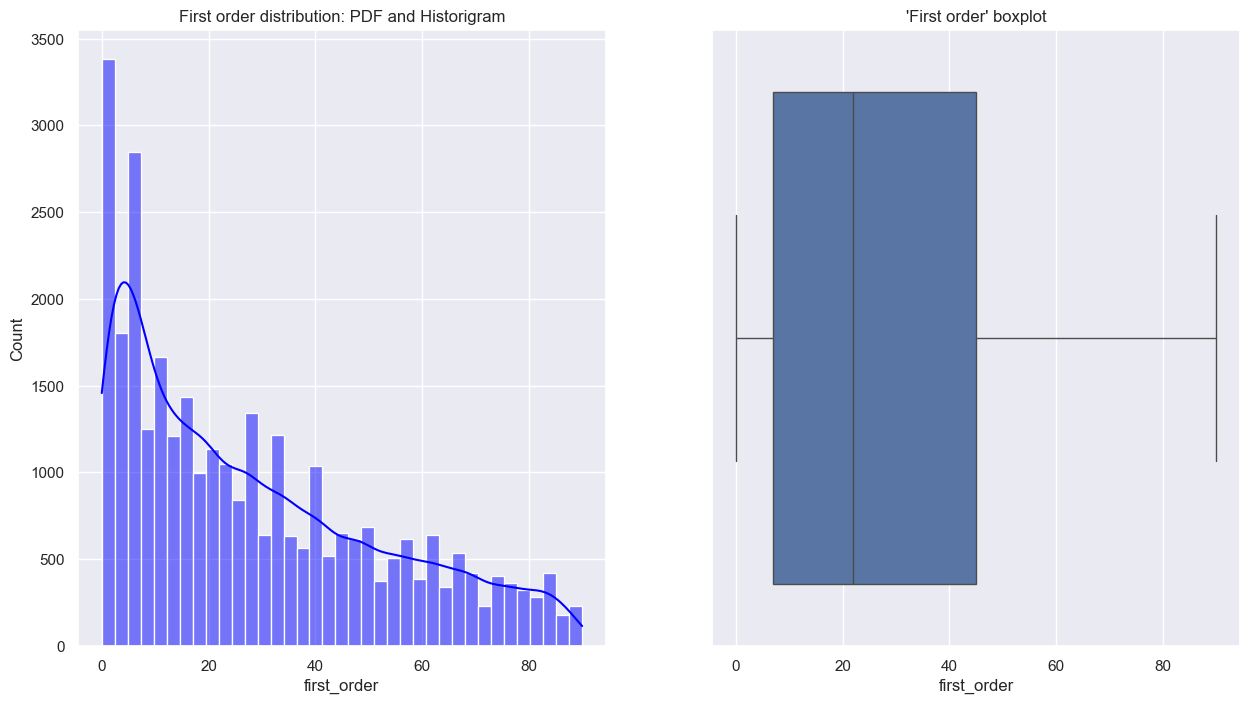

In [984]:
"""Histogram and boxplot using the Freedman - Diaconis rule mentioned above"""

#For ploting purposes, we removed the NaN values
df_fo_without_na = df["first_order"].dropna()

Q1,Q3 = np.nanpercentile(df_fo_without_na, [25, 75])
IQR = Q3-Q1
fd_bin_width = (2*IQR)/len(df_fo_without_na)**(1/3)
df_optimal_num_bins = int((max(df_fo_without_na)-min(df_fo_without_na))/fd_bin_width)

fig, axes = plt.subplots(1, 2, figsize = (15,8))
sns.histplot(df_fo_without_na, kde=True, color="blue", bins=df_optimal_num_bins, ax=axes[0])
axes[0].set_title("First order distribution: PDF and Historigram")

sns.boxplot(x = df_fo_without_na, ax=axes[1])
axes[1].set_title("'First order' boxplot")
plt.show()

#### <u> Conclusions </u>
#### Based on the historigram and boxplot, we can conclude the following regarding the first order:

- No traditional outliers
- The distribution is positive skewed, meaning that clients tend to make their first order in the first month
- 60% of clients made their first order in the first month and 75% after one month and half
- Only 10% of clients took longer than 67 days to make their first order

#### Based on the analyzis, the following questions were raised:
1. Analyzing inactive/active users
    - From the 60% of clients that made their first order before the end of first month, how many became inactive and active users in the 2 months that followed?
        -How to determine inactive users do this: For the customers who made their first order before the end of first month, check how many have the first_order value equal to the last_order value 
    - From the clients 40% of clients that made their first order after 1 month, how many became inactive or active users in the 2 months that followed?

In [985]:
"""Analyze num of outliers"""
outlier_detection(df, ["first_order"])

first_order: Number of extreme outliers: 0, Number of moderate outliers: 4933
Total number of outliers: 4933



[Text(0, 0, '61.0%'), Text(0, 0, '26.0%'), Text(0, 0, '14.0%')]

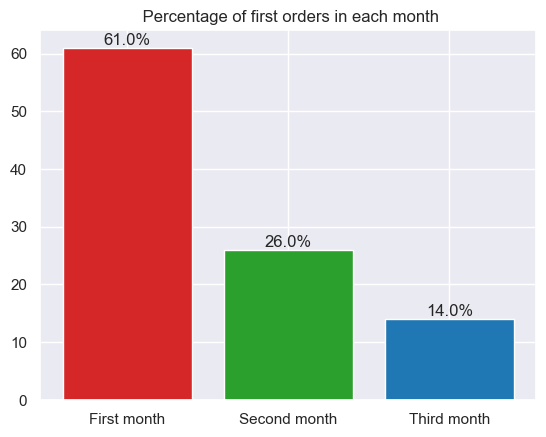

In [986]:
"""
Analyzing the % of clients who made their first order in each month
"""
total_fo = int(df["first_order"].count())
first_month_fo = int(df["first_order"].loc[df["first_order"] <= 30].count())
second_month_fo = int(df["first_order"].loc[(df["first_order"] > 30) & (df["first_order"] <= 60)].count())
third_month_fo = int(df["first_order"].loc[(df["first_order"] > 60) & (df["first_order"] <= 90)].count())
y_values = [first_month_fo, second_month_fo, third_month_fo]
#Change to percentage values. Didn't do it above to avoid making the code too long
for i in range(len(y_values)):
    y_values[i] = round((y_values[i]/total_fo)*100, 0)

"""
1. Note that the meaning of the parameter label is different in ax.bar() and ax.bar_label()
1.1 In ax.bar(), it helps us define the different names going to be used in the 'legend' (rigth end corner)
2. ax.bar_label()
2.1 Helps us define the values that appear at the top of each bar
2.2 For it to work, we need to save ax.bar() in a variable
"""
x_values = ["First month", "Second month", "Third month"]
fig, ax = plt.subplots(nrows=1, ncols=1)
bar_color = ["tab:red", "tab:green", "tab:blue"]
bar_label_values = ax.bar(x_values, y_values, color = bar_color)
ax.set_title(" Percentage of first orders in each month")
ax.bar_label(bar_label_values, labels= [str(element) + "%" for element in y_values])



#### <u> Conclusions: </u>
1. We can clearly see the dominance of the first month, represeting the month where 61% of total first orders were made by the customers
2. From the first to the second month, there is a reduction of 35p.p and from the first to the third a reduction of 47p.p 
3. Combined, the second and third month only represent around 66% of the total representation of the first month

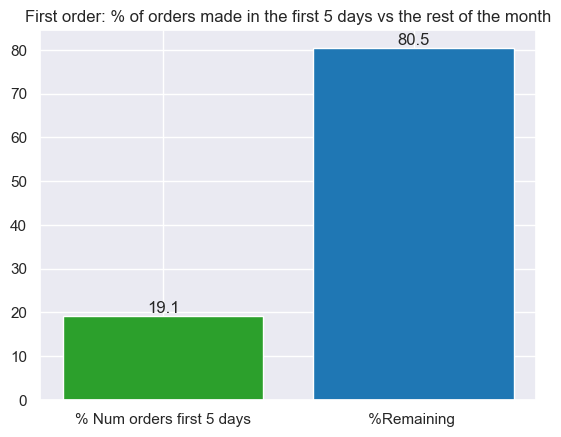

In [987]:
"""Analyzing the % of orders made in the first 5 days vs the rest of the month"""

total_elements = len(df["first_order"])
fo_5_days = round((df["first_order"].loc[df["first_order"] <= 5].count()/total_elements)*100,1)
fo_remaining = round((df["first_order"].loc[df["first_order"] >5].count()/total_elements)*100,1)

fig, ax = plt.subplots()
x_values = ["% Num orders first 5 days", " %Remaining  "]
bar_colours = ["tab:green", "tab:blue"]

y_values = [fo_5_days, fo_remaining]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [f"{element:,}" for element in y_values])
ax.set_title("First order: % of orders made in the first 5 days vs the rest of the month")
plt.show()

### Key Notes on first order
- Represents a discrete numerical variable (values between 0 and 90)
- No traditional outliers
- Despite low number of NaN values (106), they are quite interesting. Don't think they are NaN for lack of infromation but due to error. My suggestion: Input the hidden NaN values with a 0. 
- No hidden NaN values
- Changed data format from float64 to int64


---

### **`Last_order`**

In [988]:
"""Understanding the feature"""
df["last_order"].info()

<class 'pandas.core.series.Series'>
Index: 31875 entries, 0 to 31887
Series name: last_order
Non-Null Count  Dtype
--------------  -----
31875 non-null  int64
dtypes: int64(1)
memory usage: 498.0 KB


In [989]:
"""Undestanding the statistical properties"""
df["last_order"].describe(percentiles= np.arange(0.1,1,0.05))

count    31875.000000
mean        63.672376
std         23.227992
min          0.000000
10%         27.000000
15%         35.000000
20%         42.000000
25%         49.000000
30%         55.000000
35%         60.000000
40%         64.000000
45%         68.000000
50%         70.000000
50%         70.000000
55%         74.000000
60%         76.000000
65%         79.000000
70%         81.000000
75%         83.000000
80%         84.000000
85%         86.000000
90%         87.000000
95%         89.000000
max         90.000000
Name: last_order, dtype: float64

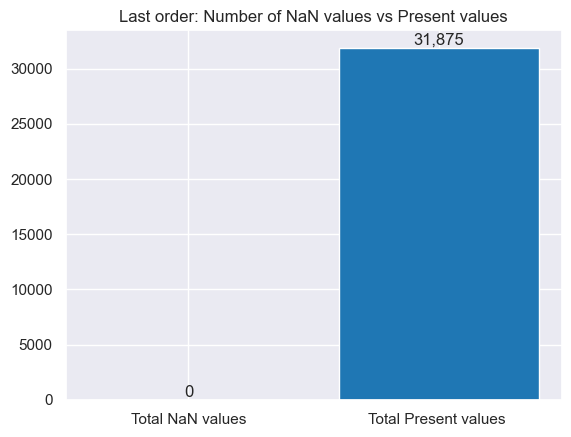

In [990]:
"""Number of NaN values vs Non missing values"""
total_elements = len(df["last_order"])
fo_perc_na_values = df["last_order"].isna().sum()
fo_per_present_values = total_elements- fo_perc_na_values

fig, ax = plt.subplots()
x_values = ["Total NaN values", "Total Present values "]
bar_colours = ["tab:green", "tab:blue"]

y_values = [fo_perc_na_values, fo_per_present_values]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [f"{element:,}" for element in y_values])
ax.set_title("Last order: Number of NaN values vs Present values")

plt.show()


In [991]:
"""Attempting to understand the NaN values better"""
# NO NaN values

'Attempting to understand the NaN values better'

In [992]:
"""Identifying possible hidden NaN values """
df["last_order"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0])

In [993]:
"""Changing dtype """
df["last_order"] = df["last_order"].astype("Int64")



<img src="Freedman–Diaconis_rule.png" style="width:300px">

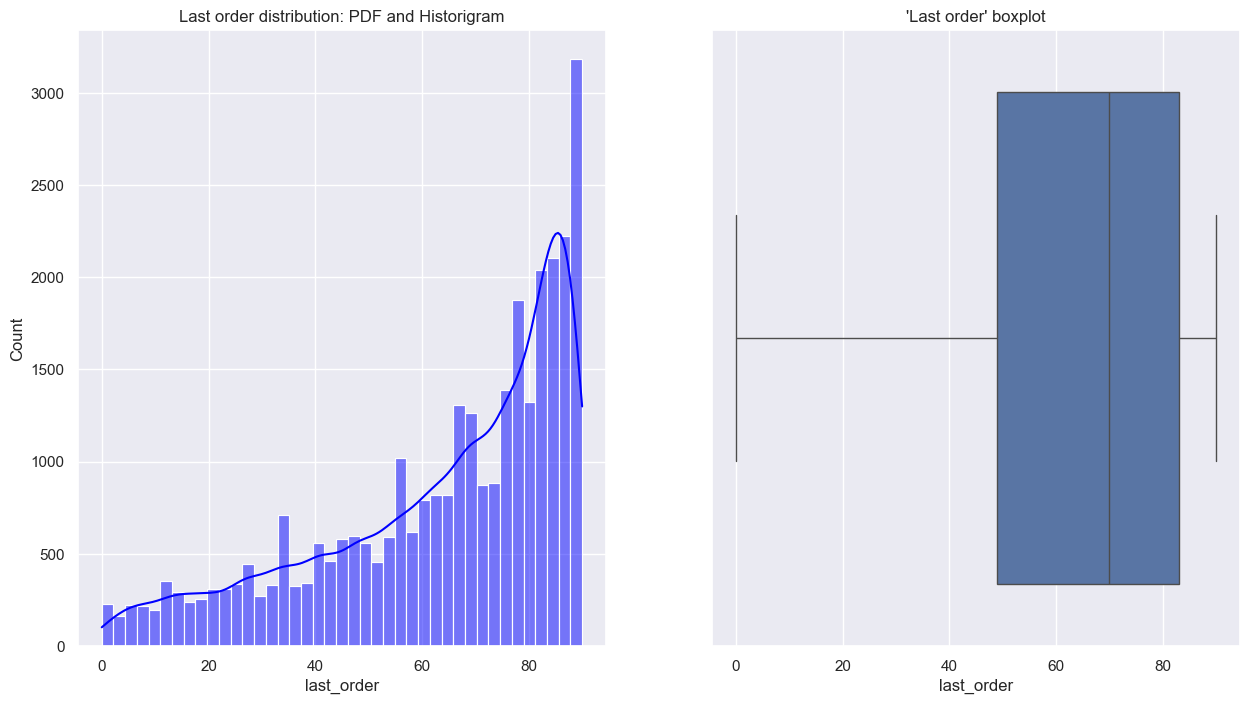

In [994]:
"""Histogram and boxplot using the Freedman - Diaconis rule mentioned above"""
Q1,Q3 = np.nanpercentile(df["last_order"], [25, 75])
IQR = Q3-Q1
fd_bin_width = (2*IQR)/len(df["last_order"])**(1/3)
df_optimal_num_bins = int((max(df["last_order"])-min(df["last_order"]))/fd_bin_width)

fig, axes = plt.subplots(1, 2, figsize = (15,8))
sns.histplot(df["last_order"], kde=True, color="blue", bins=df_optimal_num_bins, ax=axes[0])
axes[0].set_title("Last order distribution: PDF and Historigram")

sns.boxplot(x = df["last_order"], ax=axes[1])
axes[1].set_title("'Last order' boxplot")
plt.show()

In [995]:
"""Analyze num of outliers"""
outlier_detection(df, ["last_order"])

last_order: Number of extreme outliers: 0, Number of moderate outliers: 23363
Total number of outliers: 23363



#### <u> Conclusions </u>
#### - Based on the historigram and boxplot, we can conclude the following regarding the last order:

1. Visual confirmation that variable follows a left skewed distribution, meaning that clients tend to make their last order laster in time with 50%
    making it close to the middle of the last month (last 20 days of the third month)
2. There seems to be no outlier presence in the last_order variable, despite not being normally distributed and being havily skewed to the left
3. Around 65% of clients made their last order in the last month and 35% made their last order in the first 2 months


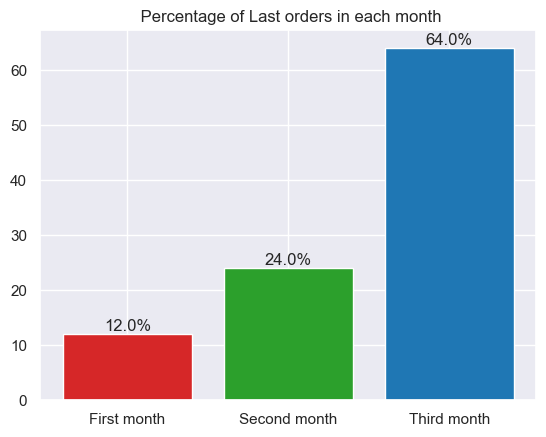

In [996]:
"""
Analyzing the % of clients who made their last order in each month
"""
total_fo = int(df["last_order"].count())
first_month_fo = int(df["last_order"].loc[df["last_order"] <= 30].count())
second_month_fo = int(df["last_order"].loc[(df["last_order"] > 30) & (df["last_order"] <= 60)].count())
third_month_fo = int(df["last_order"].loc[(df["last_order"] > 60) & (df["last_order"] <= 90)].count())
y_values = [first_month_fo, second_month_fo, third_month_fo]

#Change to percentage values. Didn't do it above to avoid making the code too long
for i in range(len(y_values)):
    y_values[i] = round((y_values[i]/total_fo)*100, 0)

"""
1. Note that the meaning of the parameter label is different in ax.bar() and ax.bar_label()
1.1 In ax.bar(), it helps us define the different names going to be used in the 'legend' (rigth end corner)
2. ax.bar_label()
2.1 Helps us define the values that appear at the top of each bar
2.2 For it to work, we need to save ax.bar() in a variable
"""
x_values = ["First month", "Second month", "Third month"]
fig, ax = plt.subplots(nrows=1, ncols=1)
bar_color = ["tab:red", "tab:green", "tab:blue"]
bar_label_values = ax.bar(x_values, y_values, color = bar_color)
ax.set_title(" Percentage of Last orders in each month")
ax.bar_label(bar_label_values, labels= [str(element) + "%" for element in y_values])

plt.show()

### Key Notes on last order
- Represents a discrete numerical variable (values between 0 and 90)
- No traditional outliers
- No NaN values, No hidden NaN values
- Changed data format from float64 to int64


---

### **`Last_promo`**

In [997]:
"""Understanding the feature"""
df["last_promo"].info()

<class 'pandas.core.series.Series'>
Index: 31875 entries, 0 to 31887
Series name: last_promo
Non-Null Count  Dtype 
--------------  ----- 
31875 non-null  object
dtypes: object(1)
memory usage: 498.0+ KB


In [998]:
"""Undestanding the statistical properties"""
df["last_promo"].describe(percentiles= np.arange(0.1,1,0.05))

count     31875
unique        4
top           -
freq      16744
Name: last_promo, dtype: object

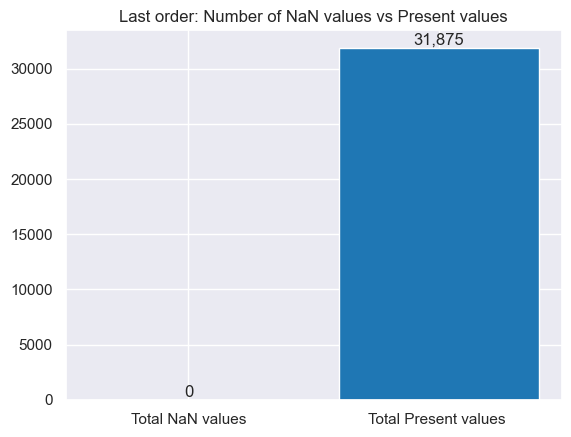

In [999]:
"""Number of NaN values vs Non missing values"""
total_elements = len(df["last_promo"])
lp_perc_na_values = df["last_promo"].isna().sum()
lp_per_present_values = total_elements- fo_perc_na_values

fig, ax = plt.subplots()
x_values = ["Total NaN values", "Total Present values "]
bar_colours = ["tab:green", "tab:blue"]

y_values = [lp_perc_na_values, lp_per_present_values]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [f"{element:,}" for element in y_values])
ax.set_title("Last order: Number of NaN values vs Present values")

plt.show()


In [1000]:
"""Attempting to understand the NaN values better"""
# NO NaN values

'Attempting to understand the NaN values better'

In [1001]:
"""Identifying possible hidden NaN values """
df["last_promo"].unique()

#Feature seems to have a strange value - '-'

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

[Text(0, 0, '52%'), Text(0, 0, '47%')]

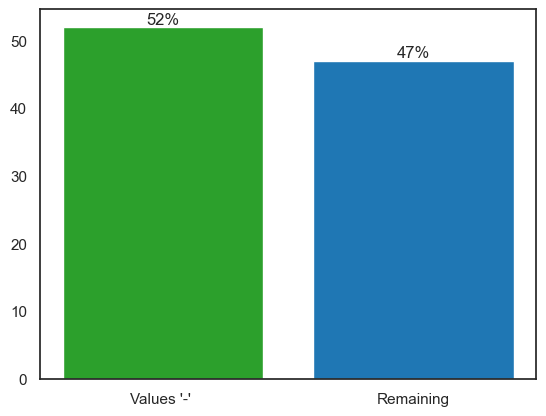

In [1002]:
"""Let's analyze the existing number of strange values ''"""
sns.set_style("white")


last_promo_strange_values = int(df["last_promo"].loc[df["last_promo"] == '-'].count() )
last_promo_remaining_values = int(df["last_promo"].loc[df["last_promo"] != '-'].count() )
total_values = df["last_promo"].count()
fig, ax = plt.subplots()
x_values = ["Values '-' ", "Remaining"]
bar_colours = ["tab:green", "tab:blue"]
y_values = [int((last_promo_strange_values/total_values)*100), int((last_promo_remaining_values/total_values)*100)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])

####  <u> Conclusions </u>
1. More than 50% of clients have the value '-' for the 'last_promo' feature 
2. Since the percentage of clients who have value '-' is very high, we will consider it not as NaN but has an indicator that no promotion code was used 

In [1003]:
"""Feature Preprocessing - Replacing '-' with 'NO PROMO USED' """

df.loc[df["last_promo"] == '-', "last_promo"] = 'NO PROMO USED'
df["last_promo"].unique()

array(['DELIVERY', 'DISCOUNT', 'NO PROMO USED', 'FREEBIE'], dtype=object)

In [1004]:
"""Checking the statistical properties after the change"""

df["last_promo"].describe()

count             31875
unique                4
top       NO PROMO USED
freq              16744
Name: last_promo, dtype: object

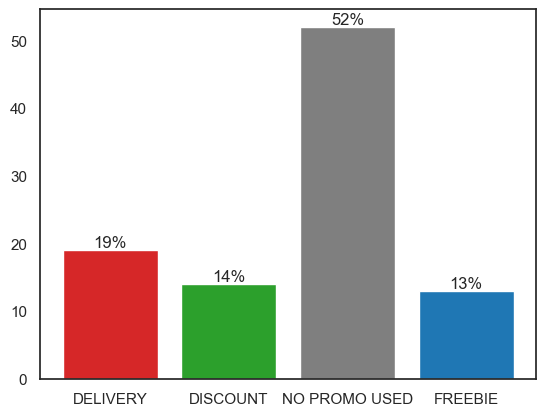

In [1005]:
"""Bar plot"""
x_values = list(df["last_promo"].unique())
delivery_promo = df["last_promo"].loc[df["last_promo"] == "DELIVERY"].count()
discount_promo = df["last_promo"].loc[df["last_promo"] ==  "DISCOUNT"].count()
no_promo_used = df["last_promo"].loc[df["last_promo"] ==  "NO PROMO USED"].count()
freebie_promo = df["last_promo"].loc[df["last_promo"] ==  "FREEBIE"].count()
total_elements = df["last_promo"].count()
y_values = [int((element/total_elements)*100) for element in [delivery_promo, discount_promo, no_promo_used, freebie_promo]]

fig, ax = plt.subplots()
bar_color = ["tab:red", "tab:green", "tab:grey", "tab:blue"]
p = ax.bar(x_values, y_values, color= bar_color)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])

plt.show()

#### <u> Conclusions </u> 
#### - Based on the barplot, we can conclude the following regarding the last promo:

1. 52% of clients haven't used any promo code in their last order. This is positive since they can be considered "profitable" clients in the last offer
2. The 48% remaining clients were less profitable to the company having received a partial discount on the food and service provided or having no cost at all
3. From the "less profitable" clients segment, it's important to note the 13% of clients who used the "FREEBIE" promo code in their last order. This means that around one out of every 10 last orders resulted in an incurrered lost to the company

#### - Based on the analyzis, the following questions were raised:
1. Did the FREEBIE clients make only one purchase order? This would mean they incurred a loss to the company

### Key Notes on 'last_promo'
- Represents a categorical ordinal feature (Ordinal from 'NO PROMO USED' to 'FREEBIE')
- Visually doesn't seem to have outliers
- Had a strange value ('-')
- Preprocessing activities: Changed the strange value to 'NO PROMO USED'
- Didn't change the dtype 

---

### **`Customer Age`**

In [1006]:
df['customer_age'].describe().round(2)

count    31148.00
mean        27.51
std          7.16
min         15.00
25%         23.00
50%         26.00
75%         31.00
max         80.00
Name: customer_age, dtype: float64

In [1007]:
median_age = df['customer_age'].median()
print(median_age)

mode_age = df['customer_age'].mode()
print(mode_age)

26.0
0    23.0
Name: customer_age, dtype: float64


In [1008]:
df['customer_age'].value_counts()

customer_age
23.0    2359
22.0    2317
24.0    2303
25.0    2261
26.0    2059
        ... 
79.0       2
75.0       2
78.0       1
71.0       1
73.0       1
Name: count, Length: 66, dtype: int64

In [1009]:
df['customer_age'].isna().sum()

np.int64(727)

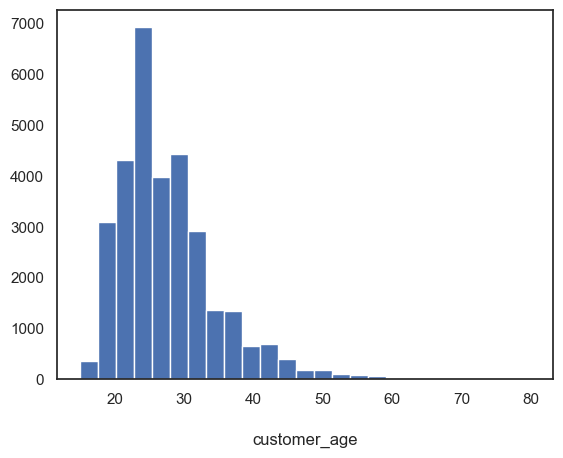

In [1010]:
# customer age histogram
plt.hist(df["customer_age"], bins=25)  # 13 bins bc age range is 65 so bins are 5 years each
plt.title("customer_age", y=-0.2)

plt.show()

 - Nearly 2/3 of the data is from customers between the ages of 20 and 30 - maybe we should focus on this agegroup  
 - Looks like an F distribution

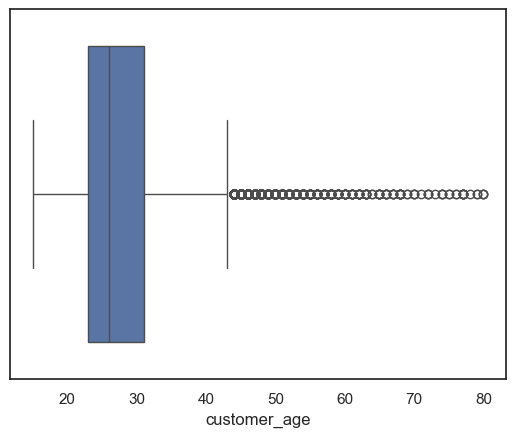

In [1011]:
#customer age boxplot
sns.boxplot(x=df["customer_age"])

plt.show()

In [1012]:
#let's take a closer look at outliers
age_IQR = df['customer_age'].quantile(0.75) - df['customer_age'].quantile(0.25)
print(age_IQR)

age_lower_bound = df['customer_age'].quantile(0.25) - 1.5 * age_IQR
age_upper_bound = df['customer_age'].quantile(0.75) + 1.5 * age_IQR

print(age_lower_bound)
print(age_upper_bound)

age_outliers = df[(df['customer_age'] < age_lower_bound) | (df['customer_age'] > age_upper_bound)]

print(age_outliers)

8.0
11.0
43.0
      customer_id customer_region  customer_age  vendor_count  product_count  \
15     f49ed5489a            8670          51.0             2              2   
21     eb13ad08ad            8670          47.0             4              6   
28     b92ab1eeec            2360          47.0             5              6   
51     a9f54fe565            8670          48.0             2              4   
124    085c69caf5            2490          46.0             5             10   
...           ...             ...           ...           ...            ...   
31777  eb13c834e7            2360          74.0             1              1   
31788  12faabe829            8670          46.0             1              2   
31797  20c90aaf32               -          55.0             1              1   
31809  4ff94a6987            2360          60.0             1              1   
31850  b32f05f979            2360          51.0             1              1   

       is_chain  first_or

In [1013]:
age_outliers.shape

(1083, 56)

In [1014]:
age_outliers['customer_age'].value_counts()

customer_age
44.0    157
46.0    123
45.0    123
48.0     89
47.0     88
50.0     65
49.0     59
51.0     58
53.0     53
52.0     47
54.0     34
55.0     28
58.0     26
56.0     19
57.0     17
59.0     12
60.0      9
68.0      8
62.0      8
61.0      7
63.0      7
77.0      6
65.0      6
66.0      5
67.0      4
70.0      3
72.0      3
74.0      3
80.0      3
64.0      2
76.0      2
69.0      2
79.0      2
75.0      2
78.0      1
71.0      1
73.0      1
Name: count, dtype: int64

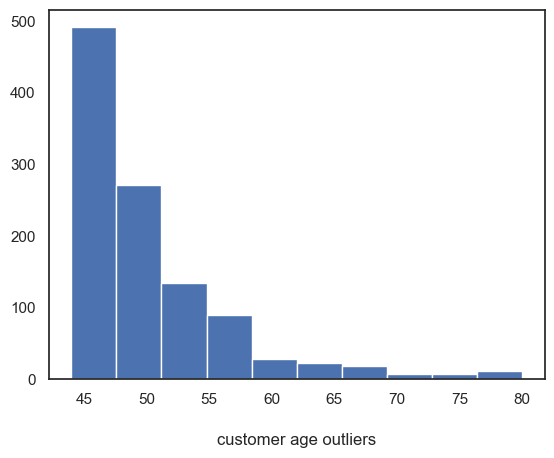

In [1015]:
# customer age outlier histogram
plt.hist(age_outliers["customer_age"], bins=10)  # 13 bins bc age range is 65 so bins are 5 years each
plt.title("customer age outliers", y=-0.2)

plt.show()

## Customer Age Summary
- Data type is float
- No abnormal values
- Duplicates are exptected
- There are 727 missing values - currenlty stored as NaN (what percent?)
- Range is 15 years to 80 years
- Mean is 27.51, median is 26, mode is 23
- 50% of the age data is between 23 and 31
- There are 1083 age outliers - anyone over the age of 43 is an outlier

---

### **`Customer Region`**

In [1016]:
df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64

In [1017]:
#changing the 442 missing values from - to NaN
df.replace("-", np.nan, inplace=True)
df['customer_region'].isna().sum()

np.int64(442)

In [1018]:
#bar chart for customer regions
region_counts = pd.DataFrame(df['customer_region'].value_counts())

In [1019]:
print(region_counts)

                 count
customer_region       
8670              9761
4660              9550
2360              8829
2440              1483
4140               857
8370               495
2490               445
8550                13


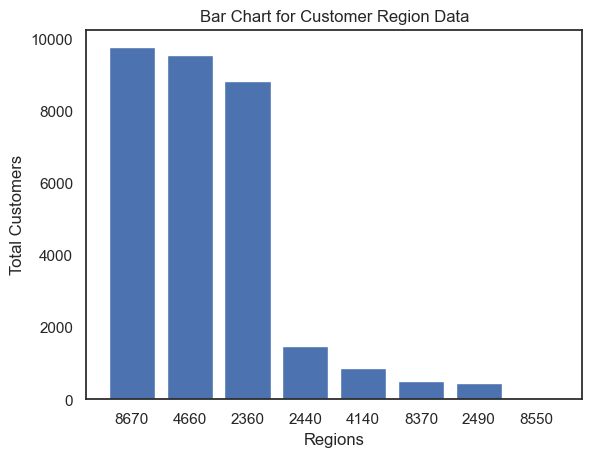

In [1020]:
#making a boxplot for region data
plt.bar(region_counts.index, region_counts['count'])

plt.title('Bar Chart for Customer Region Data')
plt.xlabel('Regions')
plt.ylabel('Total Customers')

plt.show()

In [1021]:
#sorting so the groups of regions are next to each other
region_counts.sort_index(axis=0, ascending=True, inplace=True, kind='quicksort')

In [1022]:
print(region_counts)

                 count
customer_region       
2360              8829
2440              1483
2490               445
4140               857
4660              9550
8370               495
8550                13
8670              9761


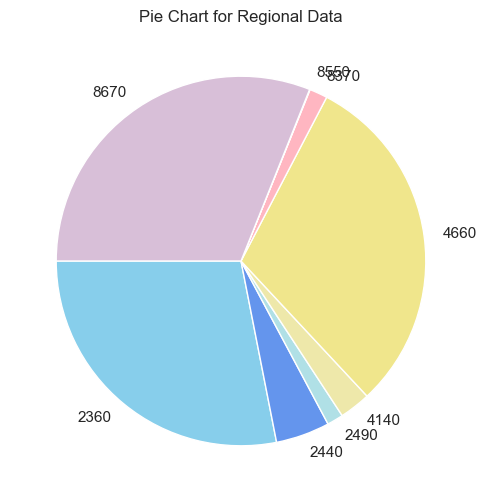

In [1023]:
#lets try a pie chart

#pinks are the 8---s, yellow are the 4---s, blue are the 2---s
color_list = ({'2360': 'skyblue', '2440': 'cornflowerblue', '2490': 'powderblue', '4140':'palegoldenrod', '4660':'khaki','8370': 'lightpink', '8550':'plum', '8670':'thistle'})

plt.figure(figsize=(6, 6))

plt.pie(region_counts['count'], labels = region_counts.index, startangle=180, colors = color_list.values())
plt.title('Pie Chart for Regional Data')

plt.show()

In [1024]:
# creating a new variable (city) that groups regions by first digit
df['city'] = df['customer_region'].str[0]
df['city'] = df['city'].replace({'2': 'City 2', '4': 'City 4', '8': 'City 8'})

In [1025]:
#moving the city column next to customer region
df.insert(df.columns.get_loc('customer_region') + 1, 'city', df.pop('city'))

In [1026]:
df.head()

,customer_id,customer_region,city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,City 2,18.0,2,5,1,0,1,DELIVERY,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,City 8,17.0,2,2,2,0,1,DISCOUNT,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,City 4,38.0,1,2,2,0,1,DISCOUNT,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,City 4,NaN,2,3,1,0,2,DELIVERY,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,City 4,20.0,2,5,0,0,2,NO PROMO USED,...,0,0,0,0,0,0,0,0,0,0


In [1027]:
#creating data frames for each of the cities
city_2 = df[df['city'] == 'City 2']
city_4 = df[df['city'] == 'City 4']
city_8 = df[df['city'] == 'City 8']

In [1028]:
#descriptive statistics for each of the cities
print(city_2.shape)
print(city_4.shape)
print(city_8.shape)

(10757, 57)
(10407, 57)
(10269, 57)


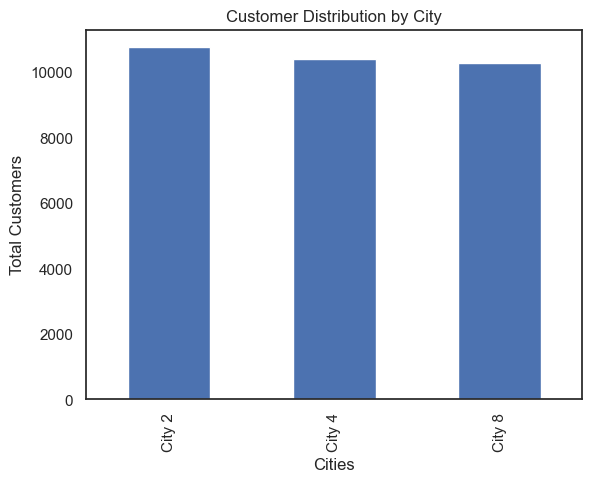

In [1029]:
#add bar chart for this
#making a boxplot for region data
city_counts = pd.DataFrame(df['city'].value_counts())

df['city'].value_counts().plot(kind='bar')

plt.title('Customer Distribution by City')
plt.xlabel('Cities')
plt.ylabel('Total Customers')

plt.show()

## Customer Region Summary
- Data type is object
- 442 missing values (what percent?)
- Duplicates are expected
- If we assume the first digit of the region indicates city, customers are split appproximately evenly throughout the three cities
    - 10,757 customers in City 2 (cities beginning with 2)
    - 10,407 customers in City 4 (cities beginning with 4)
    - 10,282 customers in City 8 (cities beginning with 8)
- The majority of customers live in 3 of the 8 regions:
    - 2360
    - 4660
    - 8670  

It is probably safe to assume these are the city centers of the cities

---

### **`Payment method`**

In [1030]:
df['payment_method'].value_counts()

payment_method
CARD    20153
DIGI     6098
CASH     5624
Name: count, dtype: int64

In [1031]:
payment_groups = pd.DataFrame(df['payment_method'].value_counts())

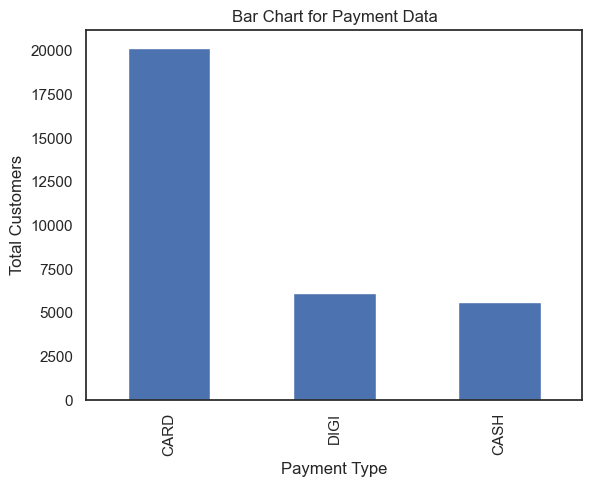

In [1032]:
#bar chat for a visual
df['payment_method'].value_counts().plot(kind='bar')

plt.title('Bar Chart for Payment Data')
plt.xlabel('Payment Type')
plt.ylabel('Total Customers')

plt.show()

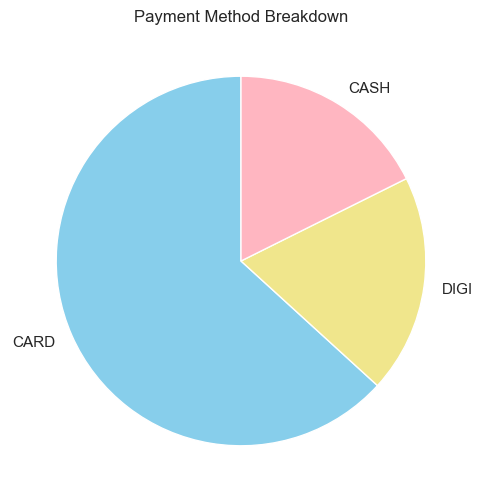

In [1033]:
#a pie chart for fun
plt.figure(figsize=(6, 6))

plt.pie(payment_groups['count'], labels = payment_groups.index, startangle = 90, colors = ['skyblue','khaki','lightpink'])
plt.title('Payment Method Breakdown')


plt.show()

## Feature Engineering: Payment method as online or in-person

In [1034]:
df['payment_method_combined'] = df['payment_method']
df['payment_method_combined'] = df['payment_method_combined'].replace({'CARD': 'In Person', 'CASH': 'In Person', 'DIGI': 'Online'})

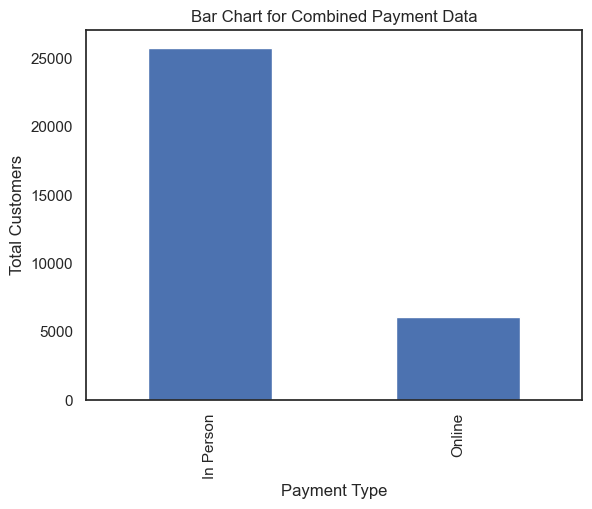

In [1035]:
df['payment_method_combined'].value_counts().plot(kind='bar')

plt.title('Bar Chart for Combined Payment Data')
plt.xlabel('Payment Type')
plt.ylabel('Total Customers')

plt.show()

# Payment Method Summary  
- Data type is object
- Duplicate values are expected
- No missing values
- 2/3 of customers pay with card
- Not much else to do with payment method on its own

---

### **`CUI_variables`**

- These variables are floats.
- There no missing values in these variables.
- There are several answers that corresponds to the fact that cutomers have not spend any monetary units in asked type of cuisine.

In [1036]:
# I created a list where all CUI_ variables are included. So then it is easier to just call cui_columns
#  in a loop instead of writing each variable every time    

cui_columns = ['CUI_American','CUI_Asian','CUI_Beverages','CUI_Cafe','CUI_Chicken Dishes','CUI_Chinese','CUI_Desserts','CUI_Healthy','CUI_Indian','CUI_Italian','CUI_Japanese','CUI_Noodle Dishes','CUI_OTHER','CUI_Street Food / Snacks','CUI_Thai']
df[cui_columns]


,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0
1,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0
4,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
31884,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
31885,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
31886,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [1037]:
df[cui_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUI_American              31875 non-null  float64
 1   CUI_Asian                 31875 non-null  float64
 2   CUI_Beverages             31875 non-null  float64
 3   CUI_Cafe                  31875 non-null  float64
 4   CUI_Chicken Dishes        31875 non-null  float64
 5   CUI_Chinese               31875 non-null  float64
 6   CUI_Desserts              31875 non-null  float64
 7   CUI_Healthy               31875 non-null  float64
 8   CUI_Indian                31875 non-null  float64
 9   CUI_Italian               31875 non-null  float64
 10  CUI_Japanese              31875 non-null  float64
 11  CUI_Noodle Dishes         31875 non-null  float64
 12  CUI_OTHER                 31875 non-null  float64
 13  CUI_Street Food / Snacks  31875 non-null  float64
 14  CUI_Thai   

In [1038]:
df[cui_columns].describe()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,4.877205,9.955306,2.298224,0.801490,0.768409,1.431801,0.884719,0.950590,1.631818,3.234729,2.996031,0.711966,3.001137,3.910391,0.842040
std,11.647043,23.561492,8.475868,6.428422,3.657986,8.193374,5.260910,5.831747,7.444679,11.250094,10.182406,4.537359,9.770104,15.548367,4.433918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280.210000,896.710000,229.220000,326.100000,219.660000,739.730000,230.070000,255.810000,309.070000,468.330000,706.140000,275.110000,366.080000,454.450000,136.380000


In [1039]:
zero_counts = {}

for column in cui_columns:
    zero_counts[column] = (df[column] == 0.00).sum()

for column, count in zero_counts.items():
    print(f"Number of 0.00 values for {column}: {count}")

Number of 0.00 values for CUI_American: 21084
Number of 0.00 values for CUI_Asian: 19979
Number of 0.00 values for CUI_Beverages: 26444
Number of 0.00 values for CUI_Cafe: 30509
Number of 0.00 values for CUI_Chicken Dishes: 28627
Number of 0.00 values for CUI_Chinese: 28353
Number of 0.00 values for CUI_Desserts: 29859
Number of 0.00 values for CUI_Healthy: 29706
Number of 0.00 values for CUI_Indian: 28427
Number of 0.00 values for CUI_Italian: 25427
Number of 0.00 values for CUI_Japanese: 25575
Number of 0.00 values for CUI_Noodle Dishes: 29649
Number of 0.00 values for CUI_OTHER: 24834
Number of 0.00 values for CUI_Street Food / Snacks: 27631
Number of 0.00 values for CUI_Thai: 29497


In [1040]:
percentage = {}
for column, count in zero_counts.items():
    percentage[column] = round((count / 31888) * 100, 2)

# Sort the dictionary in ascending order
sorted_percentage = dict(sorted(percentage.items(), key=lambda x: x[1], reverse=True))

for key, value in sorted_percentage.items():
    print(f"Percentage share of 0.00 values in {key}: {value}%")


Percentage share of 0.00 values in CUI_Cafe: 95.68%
Percentage share of 0.00 values in CUI_Desserts: 93.64%
Percentage share of 0.00 values in CUI_Healthy: 93.16%
Percentage share of 0.00 values in CUI_Noodle Dishes: 92.98%
Percentage share of 0.00 values in CUI_Thai: 92.5%
Percentage share of 0.00 values in CUI_Chicken Dishes: 89.77%
Percentage share of 0.00 values in CUI_Indian: 89.15%
Percentage share of 0.00 values in CUI_Chinese: 88.91%
Percentage share of 0.00 values in CUI_Street Food / Snacks: 86.65%
Percentage share of 0.00 values in CUI_Beverages: 82.93%
Percentage share of 0.00 values in CUI_Japanese: 80.2%
Percentage share of 0.00 values in CUI_Italian: 79.74%
Percentage share of 0.00 values in CUI_OTHER: 77.88%
Percentage share of 0.00 values in CUI_American: 66.12%
Percentage share of 0.00 values in CUI_Asian: 62.65%


In [1041]:
# Calulating how many rows (customers) there are that have 0 values for each cusine 
# Checking for "missing values"
rows_with_only_zeros_in_cuisines = (df[cui_columns] == 0).all(axis=1)
num_rows_with_only_zeros_in_cuisines = rows_with_only_zeros_in_cuisines.sum()
print(f"There are {num_rows_with_only_zeros_in_cuisines} rows in total that are missing values in cui variables")

There are 138 rows in total that are missing values in cui variables


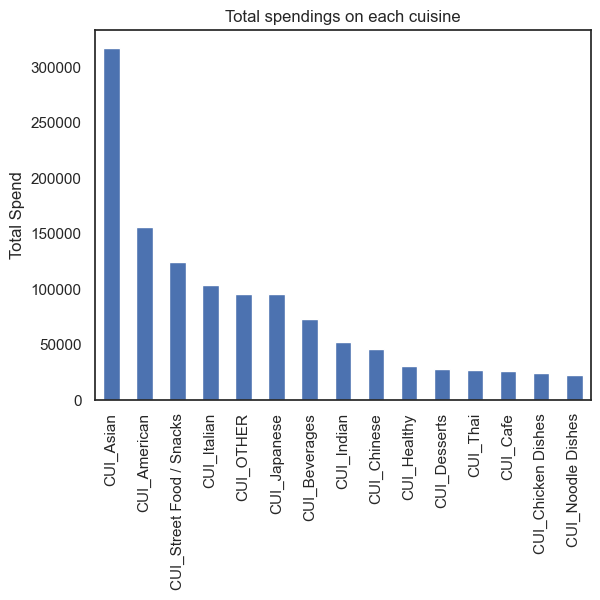

In [1042]:
sorted_sums_cui = df[cui_columns].sum().sort_values(ascending=False)

sorted_sums_cui.plot(kind='bar')

plt.title('Total spendings on each cuisine')
plt.ylabel('Total Spend')
plt.show()

Check for outliers in CUI_ columns (withouts 0 values)

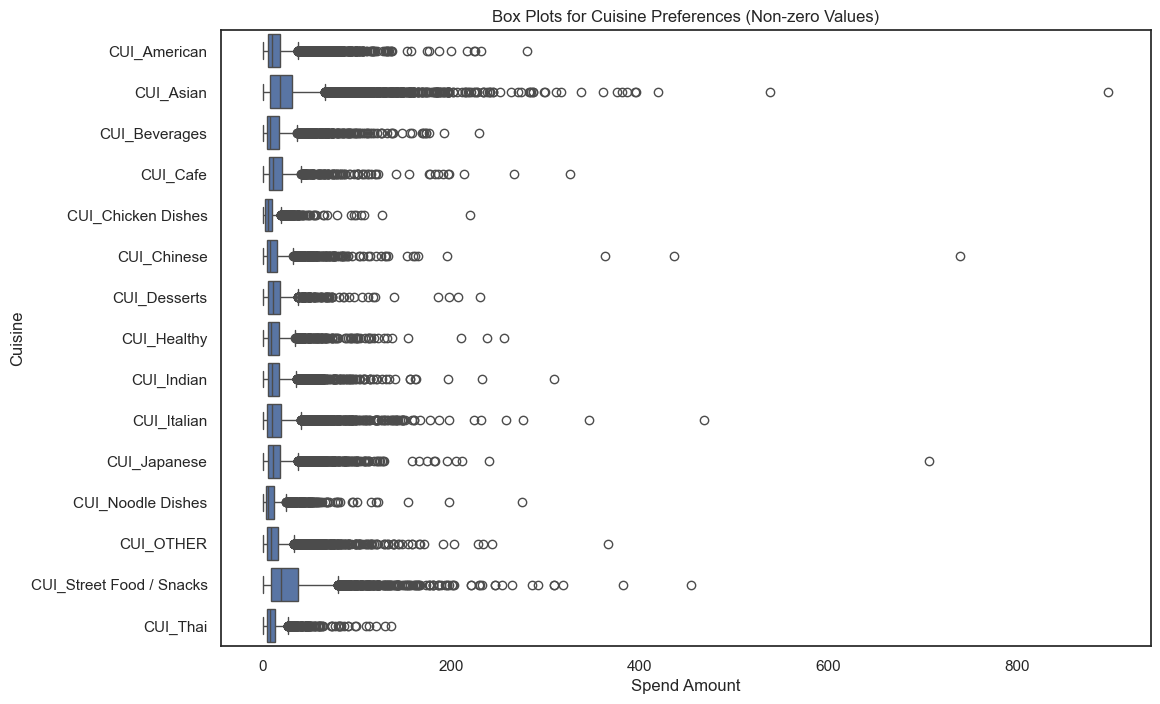

In [1043]:

df_melted = df.melt(value_vars=cui_columns, var_name='Cuisine', value_name='Spend Amount')

df_melted = df_melted[df_melted['Spend Amount'] != 0]


plt.figure(figsize=(12, 8))
sns.boxplot(y='Cuisine', x='Spend Amount', data=df_melted)

plt.title('Box Plots for Cuisine Preferences (Non-zero Values)')
plt.show()

In [1044]:
# # Number of columns and rows for the subplots
# n_cols = 4
# n_rows = 4

# # Prepare figure. Create individual axes where each histogram will be placed
# fig, axes = plt.subplots(n_rows, 
#                          n_cols, 
#                          figsize=(16, 12))  

# fig.suptitle('Histograms for Cuisine Preferences')

# # Flatten axes for easy indexing
# axes = axes.flatten()

# # Loop through each column and plot its histogram on the corresponding subplot
# for i, column in enumerate(cui_columns):
#     df[column].hist(bins=10, ax=axes[i])  # Plot the histogram
#     axes[i].set_title(f'Histogram for {column}')
#     axes[i].set_xlabel('Spend Amount')
#     axes[i].set_ylabel('Frequency')

# # Adjust layout
# # plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit everything
    
# # plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# plt.show()

Histograms above are not informative.

In [1045]:
# # Code for histograms for each value 
# sns.histplot(df['CUI_American'], bins=10) 
# plt.suptitle('Histograms for Cuisine Preferences')
# plt.show()

The histogram above does not make much sense.

In [1046]:
# # Melt the dataframe to convert it into a long format suitable for seaborn
# # It "melts" multiple columns into two columns: one for variable names and another for their corresponding values. 
# #  This is especially handy when you have multiple measurements or categories represented in separate columns.
# df_melted_cui = df.melt(value_vars=cui_columns, var_name='Cuisine', value_name='Spend Amount')

# # Create a box plot using seaborn
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='Cuisine', y='Spend Amount', data=df_melted_cui)

# plt.title('Box Plots for Cuisine Preferences')
# plt.xticks(rotation=45)  # Rotate x labels for better readability
# plt.show()



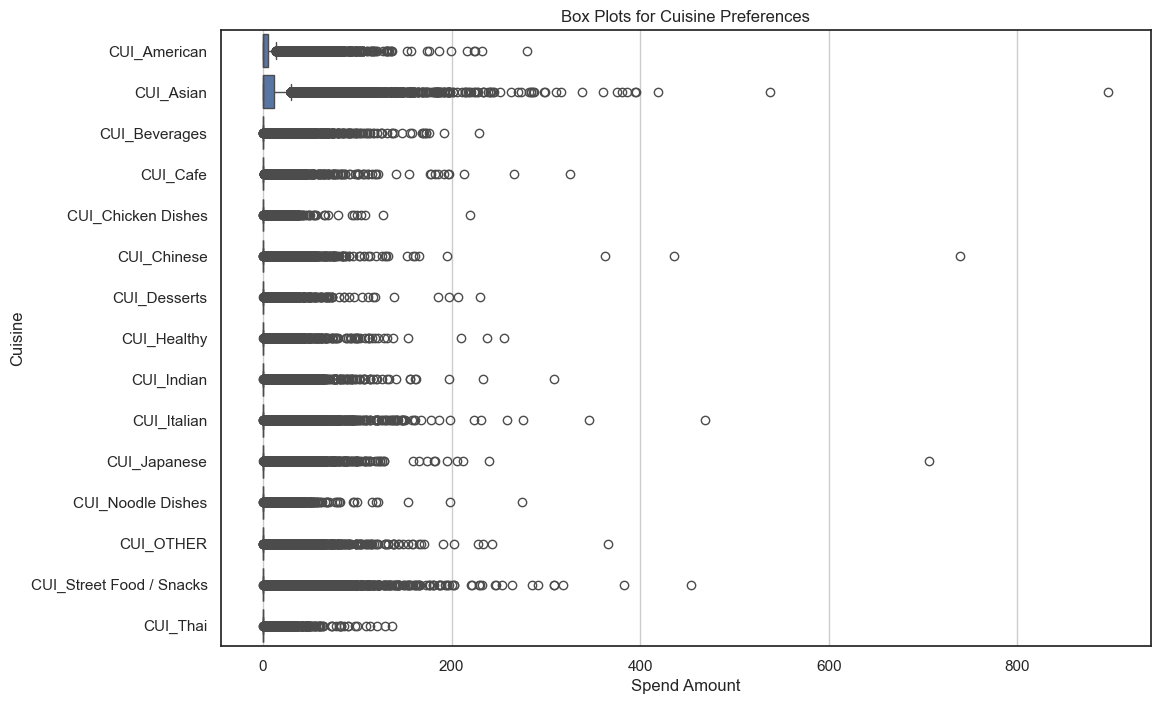

In [1047]:
df_melted = df.melt(value_vars=cui_columns, var_name='Cuisine', value_name='Spend Amount')

# Create a transposed box plot
plt.figure(figsize=(12, 8))
sns.boxplot(y='Cuisine', x='Spend Amount', data=df_melted)

plt.title('Box Plots for Cuisine Preferences')
plt.grid(axis='x')  # Optional: add grid lines for better readability
plt.show()

### ZROBIC TO BEZ 0!!!! I WTEDY TO PORÓWNAĆ 

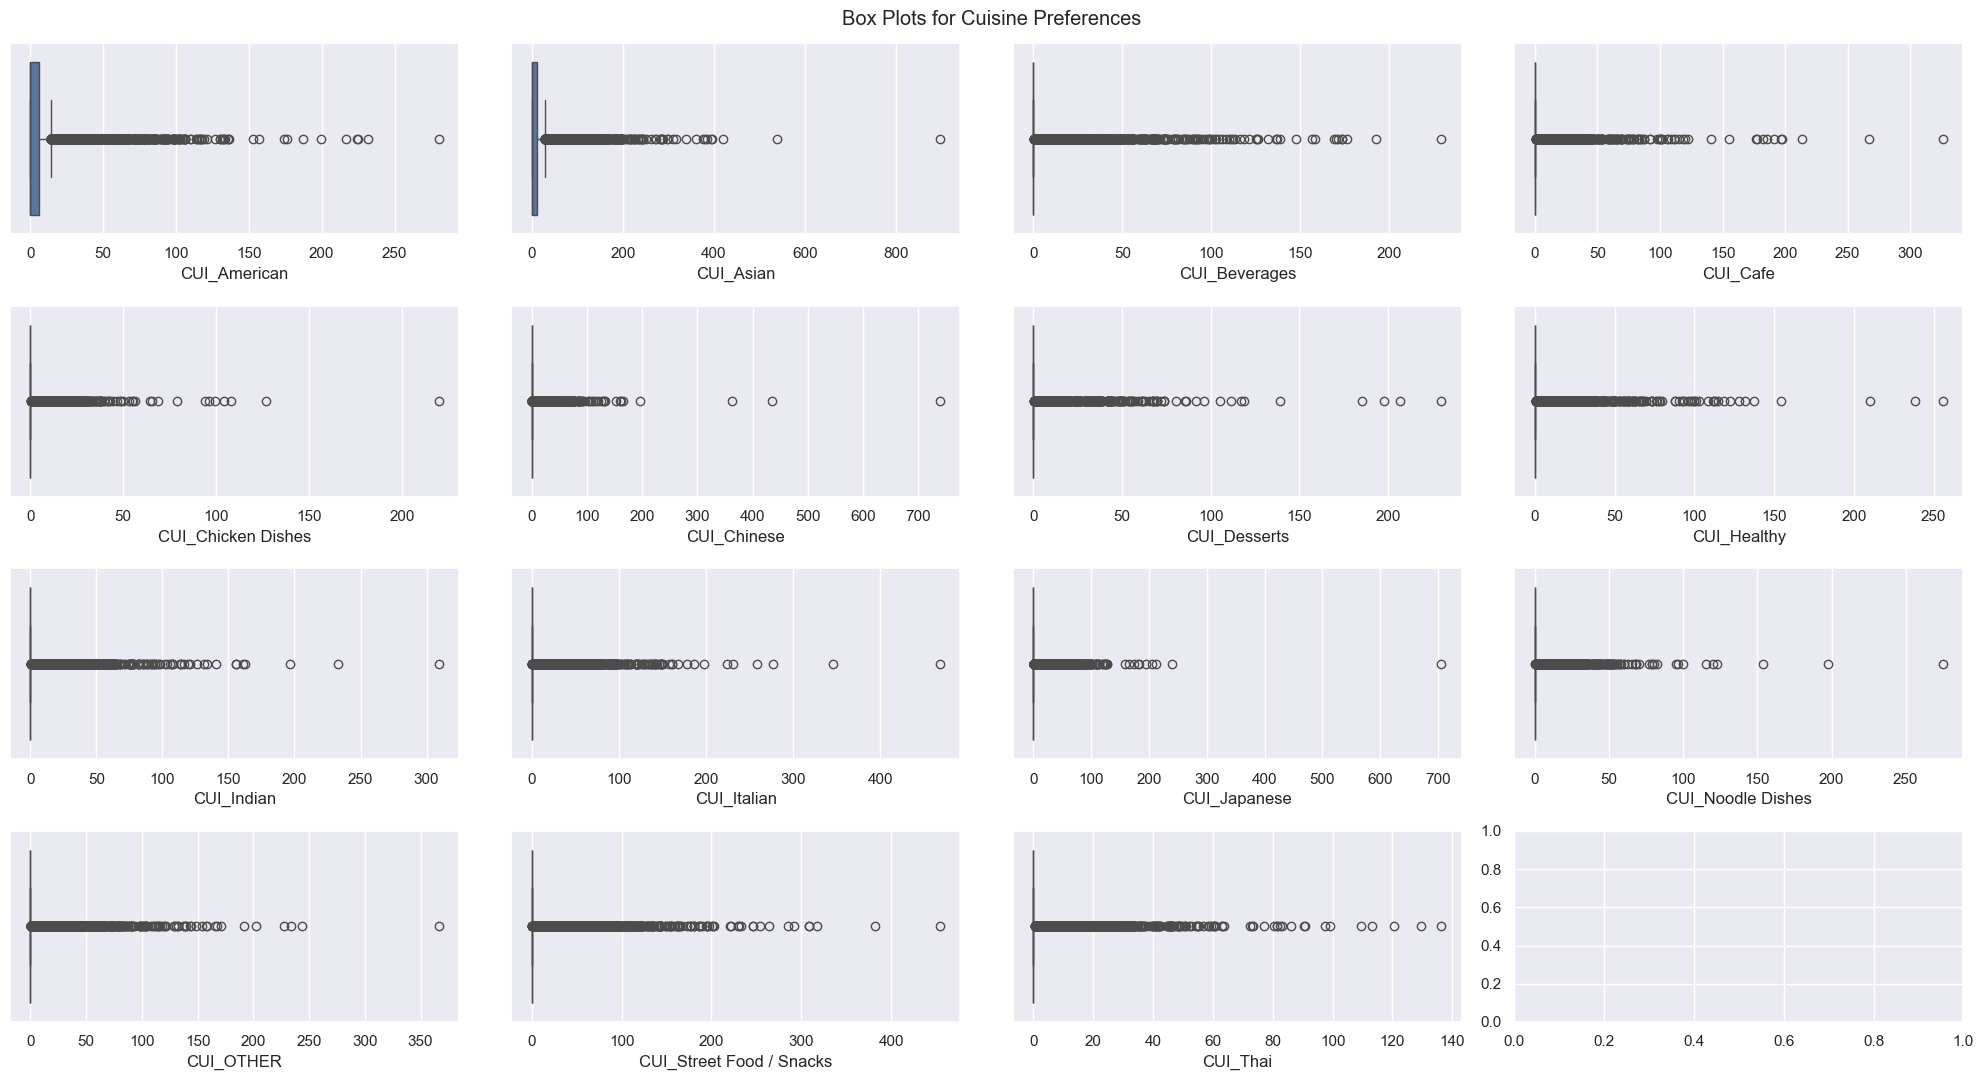

In [1048]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 4
sp_cols = math.ceil(len(cui_columns) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), df[cui_columns]): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Box Plots for Cuisine Preferences"

plt.suptitle(title)

# if not os.path.exists(os.path.join('..', 'figures', 'eda')):
#     # if the eda directory is not present then create it first
#     os.makedirs(os.path.join('..', 'figures', 'eda'))


# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

---

### **`DOW_ variables`**

In [1049]:
dow_columns = ["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6", "DOW_0"]
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [1050]:
df[dow_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DOW_1   31875 non-null  int64
 1   DOW_2   31875 non-null  int64
 2   DOW_3   31875 non-null  int64
 3   DOW_4   31875 non-null  int64
 4   DOW_5   31875 non-null  int64
 5   DOW_6   31875 non-null  int64
 6   DOW_0   31875 non-null  int64
dtypes: int64(7)
memory usage: 1.9 MB


In [1051]:
df[dow_columns].describe()

,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,DOW_0
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408,0.555922
std,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592,1.013634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000,16.000000


In [1052]:
for variable in df[dow_columns]:
    unique_v = df[variable].unique()
    print(f"Unique values for variable {variable} are: {unique_v}")

Unique values for variable DOW_1 are: [ 0  1  2  3  6  4  9  5 10  8  7 11 13 15 17 16 12]
Unique values for variable DOW_2 are: [ 0  1  2  3  4  9  5  7  6  8 15 14 10 11 12 13]
Unique values for variable DOW_3 are: [ 0  1  2  3  4  8  5  6  7  9 10 14 11 17 13 12 16]
Unique values for variable DOW_4 are: [ 0  1  2  3  6 10  4  7  5  8  9 11 14 12 13 15 16]
Unique values for variable DOW_5 are: [ 0  1  2  3  5  4 10  7  9  6  8 13 11 15 12 20 14]
Unique values for variable DOW_6 are: [ 1  2  3  4  7  9  6  5  8 10 11 17 13 12 14 20  0]
Unique values for variable DOW_0 are: [ 1  0  2  3  5  4  9  6  8 10  7 11 15 16]


There are no NaN values in the Dow_variables. Dow_ variables are numerical in a range from 0 to 20

In [1053]:
zero_counts_dow = {}

for column in dow_columns:
    zero_counts_dow[column] = (df[column] == 0).sum()

for column, count in zero_counts_dow.items():
    print(f"Number of 0 values for {column}: {count}")

Number of 0 values for DOW_1: 20557
Number of 0 values for DOW_2: 20104
Number of 0 values for DOW_3: 19619
Number of 0 values for DOW_4: 18391
Number of 0 values for DOW_5: 18784
Number of 0 values for DOW_6: 18507
Number of 0 values for DOW_0: 20632


In [1054]:
percentage_dow = {}
for column, count in zero_counts_dow.items():
    percentage_dow[column] = round((count / 31888) * 100, 2)

# Sort the dictionary in ascending order
sorted_percentage_dow = dict(sorted(percentage_dow.items(), key=lambda x: x[1], reverse=True))

for key, value in sorted_percentage_dow.items():
    print(f"Percentage share of 0 values in {key}: {value}%")


Percentage share of 0 values in DOW_0: 64.7%
Percentage share of 0 values in DOW_1: 64.47%
Percentage share of 0 values in DOW_2: 63.05%
Percentage share of 0 values in DOW_3: 61.52%
Percentage share of 0 values in DOW_5: 58.91%
Percentage share of 0 values in DOW_6: 58.04%
Percentage share of 0 values in DOW_4: 57.67%


In [1055]:
# Calulating how many rows (customers) there are that have not ordered during any of the week day
#Checking missing values 
rows_with_only_zeros_in_days = (df[dow_columns] == 0).all(axis=1)
num_rows_with_only_zeros_in_days = rows_with_only_zeros_in_days.sum()
num_rows_with_only_zeros_in_days
print(f"There are {num_rows_with_only_zeros_in_days} rows in total that are missing values in dow variables")

There are 138 rows in total that are missing values in dow variables


In [1056]:
# filtered_dow_values = pd.DataFrame()

# for column in dow_columns:
#     filtered_dow_values[column] = df[column][df[column] != 0]

# filtered_dow_values.drop()

Countplot since it is categorical variable.

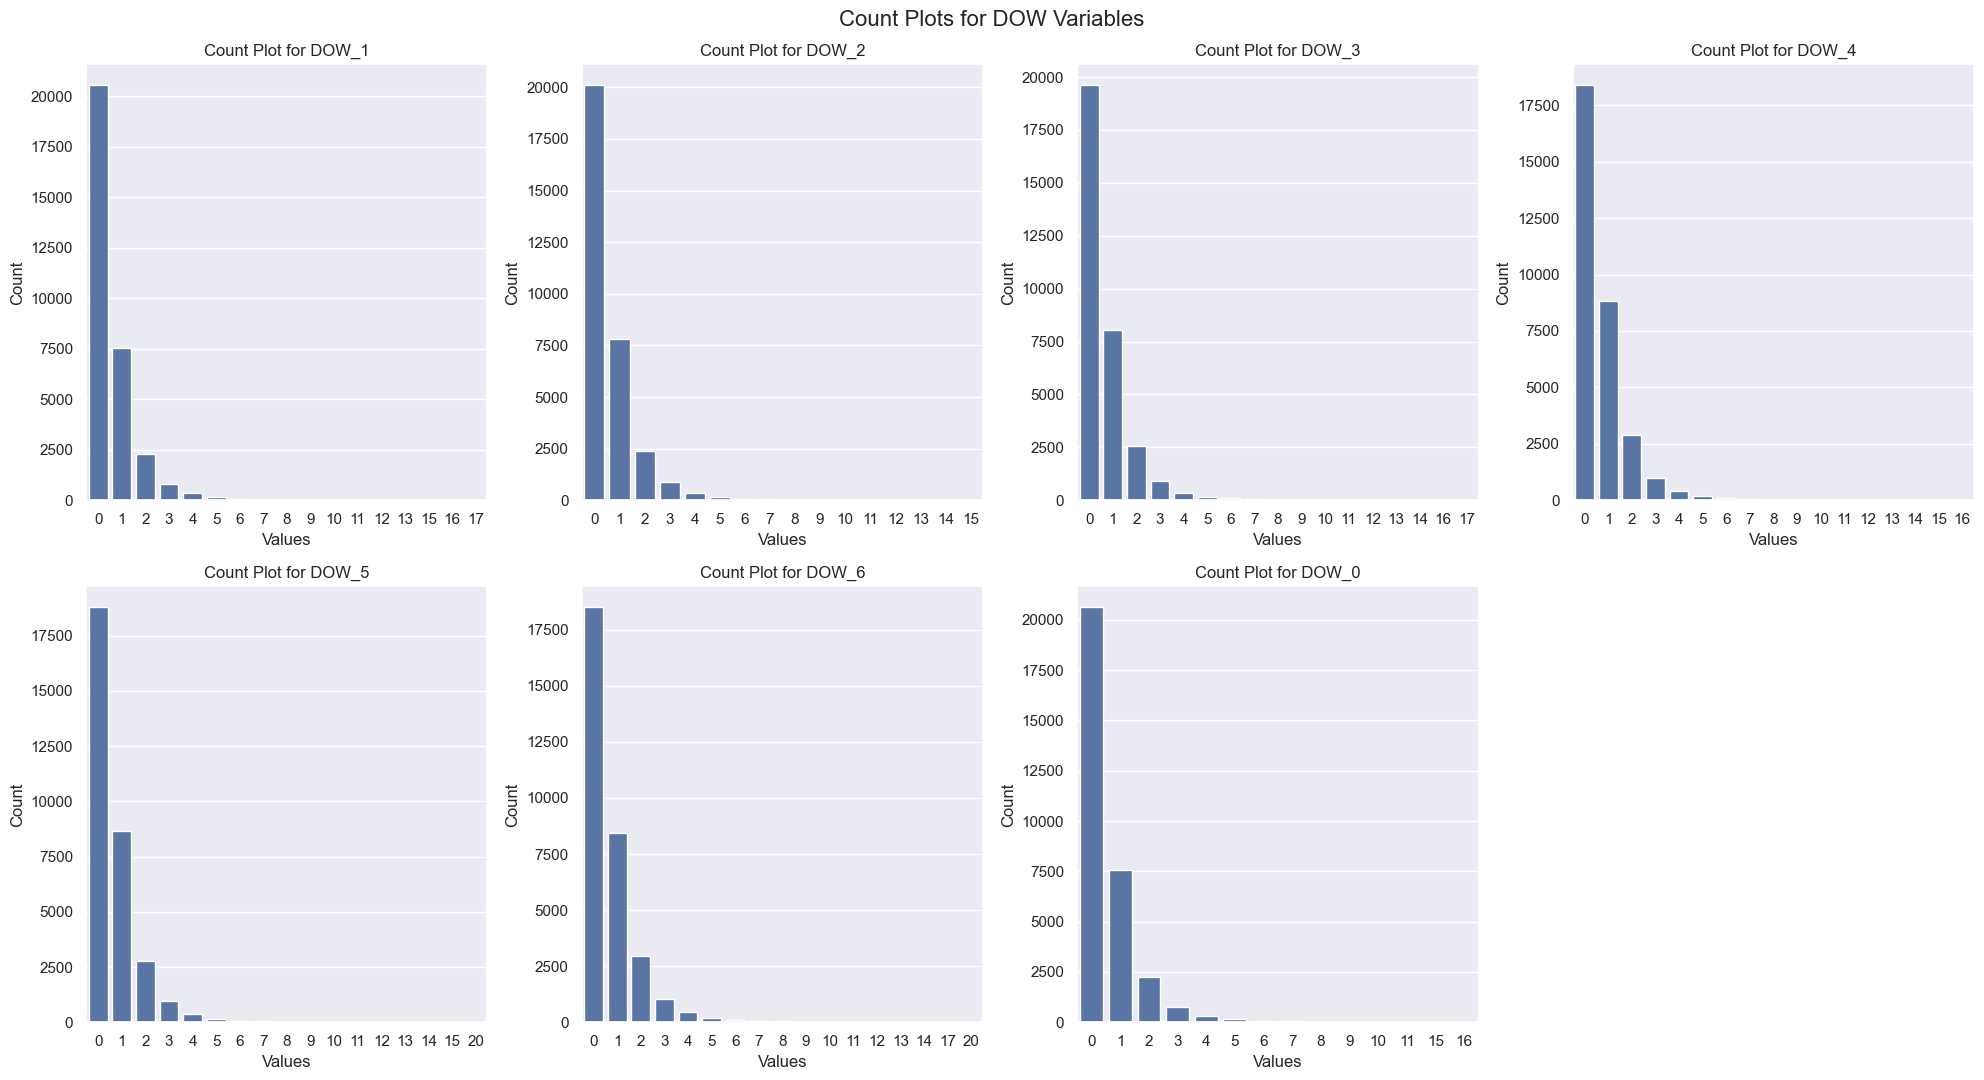

In [1057]:
sp_rows = 2
sp_cols = math.ceil(len(dow_columns) / sp_rows)

# Create subplots
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DOW column and create a countplot
for ax, column in zip(axes, dow_columns):
    sns.countplot(x=df[column], ax=ax)
    ax.set_title(f'Count Plot for {column}')  # Set title for each subplot
    ax.set_xlabel('Values')  # Label for x-axis
    ax.set_ylabel('Count')  # Label for y-axis

# If there are more axes than columns, hide the unused ones
for i in range(len(dow_columns), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.suptitle('Count Plots for DOW Variables', fontsize=16)
plt.show()


In [1058]:
# # Number of columns and rows for the subplots
# n_cols = 4
# n_rows = 2

# # Prepare figure. Create individual axes where each histogram will be placed
# fig, axes = plt.subplots(n_rows, 
#                          n_cols, 
#                          figsize=(16, 10))  

# fig.suptitle('Histograms for Number of Orders per day')

# # Flatten axes for easy indexing
# axes = axes.flatten()

# # Loop through each column and plot its histogram on the corresponding subplot
# for i, column in enumerate(dow_columns):
#     df[column].hist(bins=16, ax=axes[i])  # Plot the histogram
#     axes[i].set_title(f'Histogram for {day_names[i]}')
#     axes[i].set_xlabel('Number of orders')
#     axes[i].set_ylabel('Frequency')

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit everything
# plt.show()

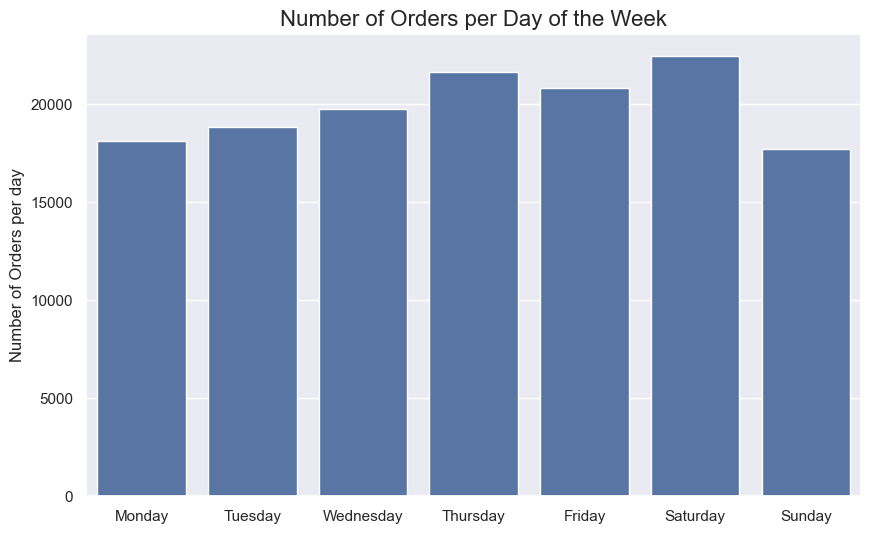

In [1059]:
# Sum the values for each day of the week
dow_plot = df[dow_columns].sum()

# Create a new DataFrame for visualization
dow_counts = pd.DataFrame({
    'Day': day_names,
    'Number of Orders': dow_plot.values
})

# Create a count plot (using barplot here since we already have aggregated data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Number of Orders', data=dow_counts)

# Set the title and labels
plt.title('Number of Orders per Day of the Week', fontsize=16)
plt.xlabel('') 
plt.ylabel('Number of Orders per day', fontsize=12)
#plt.xticks(rotation=90)  

# Show the plot
plt.show()

In [1060]:
dow_plot.describe()

count        7.000000
mean     19894.714286
std       1800.308188
min      17720.000000
25%      18463.500000
50%      19743.000000
75%      21210.000000
max      22453.000000
dtype: float64

In [1061]:
print(f"The total number of orders is: {dow_plot.sum()}")

The total number of orders is: 139263


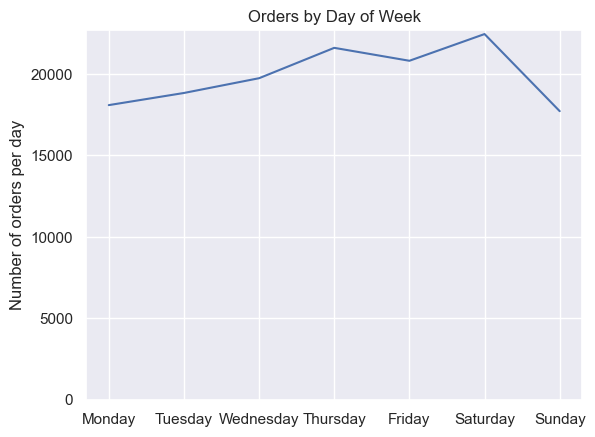

In [1062]:
# Sum the values across the days of the week in the new order
dow_plot = df[dow_columns].sum()

# Plot the data
plt.plot(dow_plot)
plt.title('Orders by Day of Week')
#plt.xlabel('Day of the Week')
plt.ylabel('Number of orders per day')

plt.xticks(ticks=range(len(day_names)), labels=day_names)
plt.ylim(bottom=0) 


# Display the plot
plt.show()


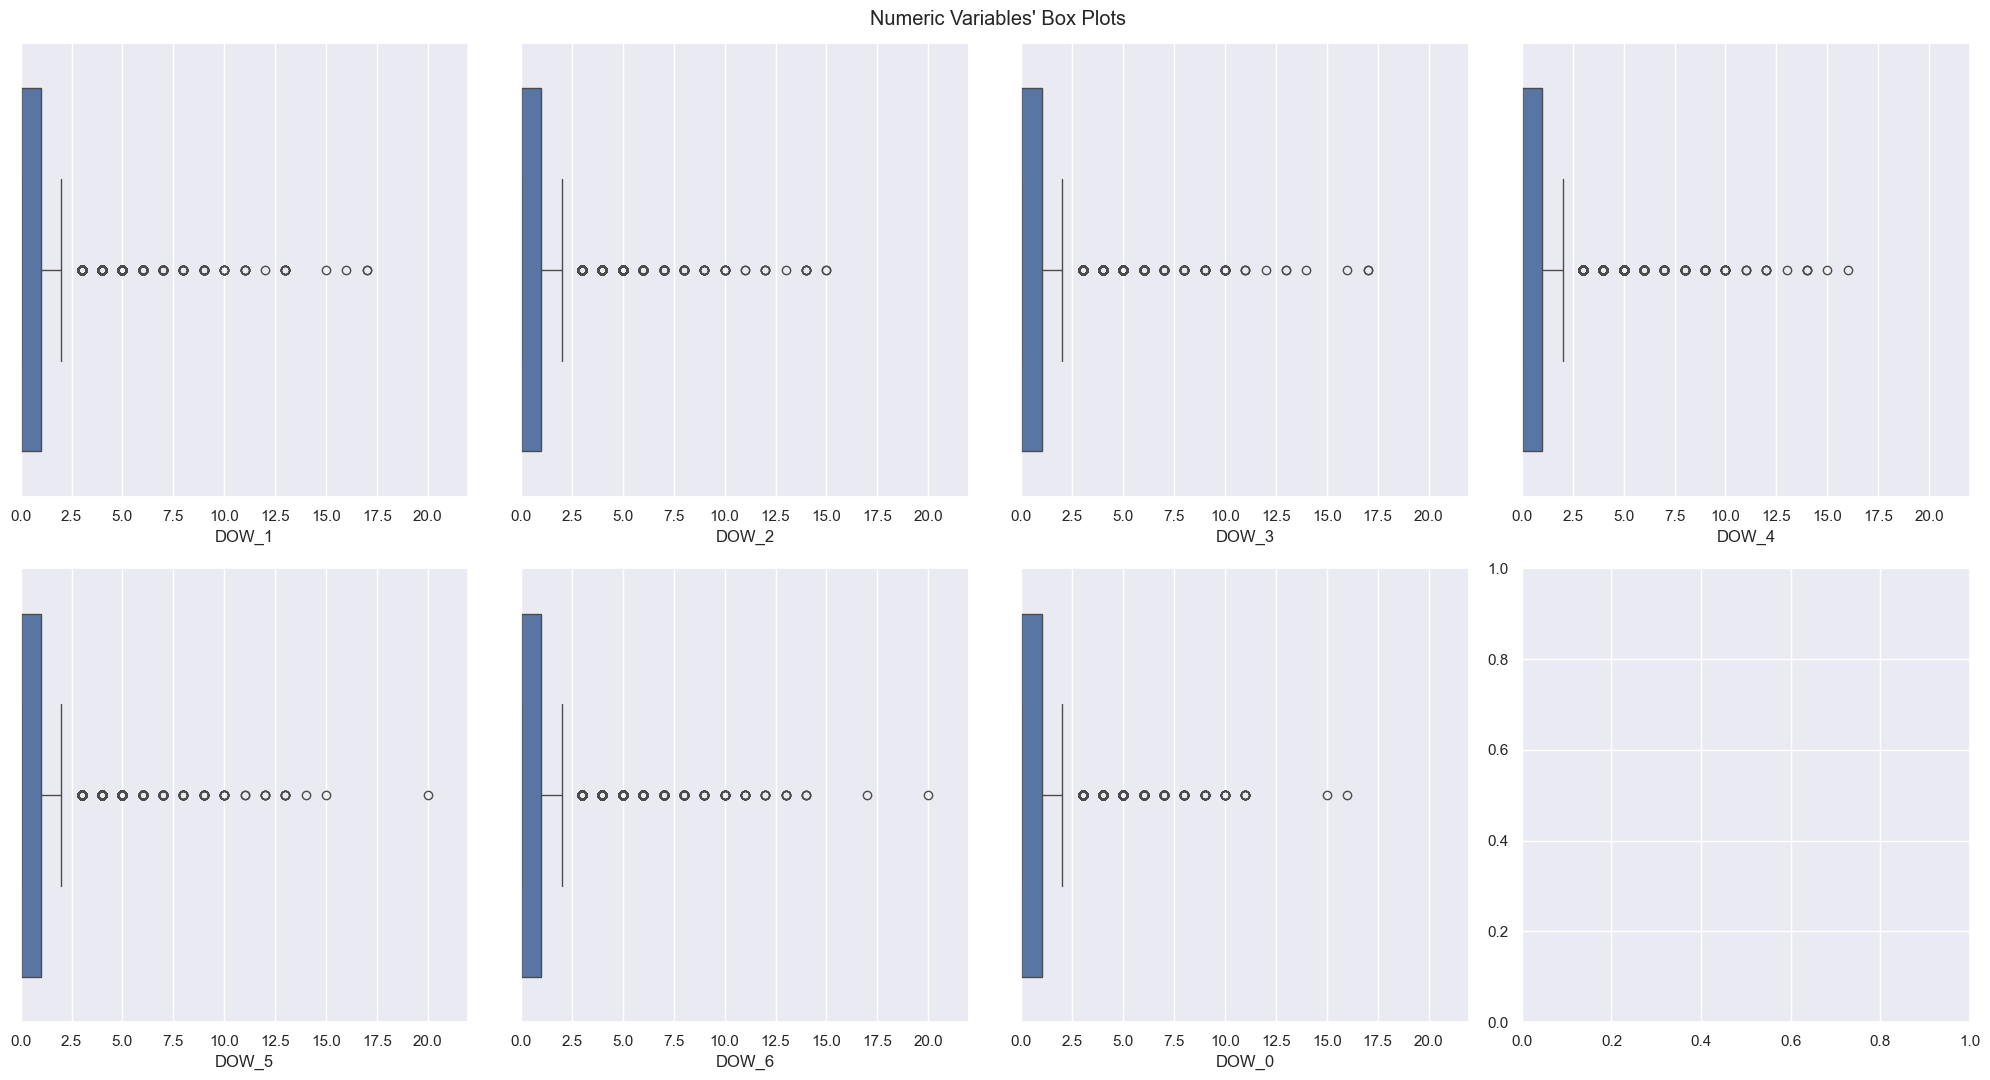

In [1063]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 2
sp_cols = math.ceil(len(dow_columns) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), df[dow_columns]): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    ax.set_xlim(0, 22)
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


#plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

---

### **`HR_ variables`**

In [1064]:
hr_columns = ["HR_0", "HR_1", "HR_2", "HR_3", "HR_4", "HR_5", "HR_6", "HR_7", "HR_8", "HR_9", "HR_10", "HR_11", 
              "HR_12", "HR_13", "HR_14", "HR_15", "HR_16", "HR_17", "HR_18", "HR_19", "HR_20", "HR_21", "HR_22", "HR_23"]

hr_values = [int(column.split('_')[1]) for column in hr_columns]

# Output the new list
print(hr_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [1065]:
df[hr_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR_0    30711 non-null  float64
 1   HR_1    31875 non-null  int64  
 2   HR_2    31875 non-null  int64  
 3   HR_3    31875 non-null  int64  
 4   HR_4    31875 non-null  int64  
 5   HR_5    31875 non-null  int64  
 6   HR_6    31875 non-null  int64  
 7   HR_7    31875 non-null  int64  
 8   HR_8    31875 non-null  int64  
 9   HR_9    31875 non-null  int64  
 10  HR_10   31875 non-null  int64  
 11  HR_11   31875 non-null  int64  
 12  HR_12   31875 non-null  int64  
 13  HR_13   31875 non-null  int64  
 14  HR_14   31875 non-null  int64  
 15  HR_15   31875 non-null  int64  
 16  HR_16   31875 non-null  int64  
 17  HR_17   31875 non-null  int64  
 18  HR_18   31875 non-null  int64  
 19  HR_19   31875 non-null  int64  
 20  HR_20   31875 non-null  int64  
 21  HR_21   31875 non-null  int64  
 22  HR_

In [1066]:
df[hr_columns].describe()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,30711.0,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.0,0.053835,0.063153,0.118306,0.101710,0.081914,0.069616,0.076675,0.131859,0.233945,...,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176
std,0.0,0.317031,0.351490,0.497117,0.437549,0.358701,0.329307,0.377349,0.635603,0.725015,...,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,14.000000,12.000000,11.000000,14.000000,7.000000,8.000000,15.000000,52.000000,23.000000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [1067]:
for variable in df[hr_columns]:
    unique_v = df[variable].unique()
    print(f"Unique values for variable {variable} are: {unique_v}")

Unique values for variable HR_0 are: [ 0. nan]
Unique values for variable HR_1 are: [ 0  1  2  4  3  5  9  6  8 14  7]
Unique values for variable HR_2 are: [ 0  1  2  5  7  3 12  6  8 10  9  4]
Unique values for variable HR_3 are: [ 0  1  2  5  7  3  4  6  8 10 11  9]
Unique values for variable HR_4 are: [ 0  1  2 13  5 10  3  7  4 14  8  6  9]
Unique values for variable HR_5 are: [0 1 2 4 3 7 5]
Unique values for variable HR_6 are: [0 1 2 4 3 7 8 5 6]
Unique values for variable HR_7 are: [ 0  1  2  3  6  5  4  7 13 14  8 15  9]
Unique values for variable HR_8 are: [ 0  1  2  4  3  6  5 10  8  7 29 21 13 26 52 20  9 12]
Unique values for variable HR_9 are: [ 0  1  2  4  3  5  7  8  6  9 15 10 11 14 23 19 13]
Unique values for variable HR_10 are: [ 0  1  5  2  3  4  6 11  7  9  8 10 17 13 16 14 12 15 20 25]
Unique values for variable HR_11 are: [ 0  1  2  3  5  4 12  8 11 14  7  6  9 21 13 16 23 10 17 36]
Unique values for variable HR_12 are: [ 0  1  2  3  4 13  5  9 12  8  6  7 10 16 1

In [1068]:
df['HR_0'].isna().sum()

np.int64(1164)

In [1069]:
df[df['HR_0'].isna()]

,customer_id,customer_region,city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,payment_method_combined
34,ae38da6386,8670,City 8,21.0,2,3,1,0,7,DELIVERY,...,0,0,0,0,0,0,0,0,0,Online
87,a21a839c77,4140,City 4,19.0,1,4,4,0,21,NO PROMO USED,...,0,0,0,0,1,0,0,1,0,In Person
121,9237d23413,8670,City 8,22.0,3,4,2,0,27,NO PROMO USED,...,0,0,0,0,0,0,0,0,0,In Person
132,8c6ffd7357,4660,City 4,25.0,3,4,1,0,28,NO PROMO USED,...,1,0,0,0,0,0,0,0,0,In Person
186,67c6c9f9c4,4660,City 4,24.0,1,3,0,0,36,FREEBIE,...,0,0,0,0,0,0,1,0,0,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,City 2,23.0,1,4,0,85,85,DELIVERY,...,0,0,0,0,0,0,0,0,0,Online
31549,ac382ddfd1,NaN,NaN,28.0,1,2,2,87,89,DELIVERY,...,0,0,0,0,0,0,0,0,1,In Person
31615,96f1fc25e3,8670,City 8,25.0,2,2,1,88,88,DELIVERY,...,0,0,0,0,0,0,0,0,0,In Person
31781,d7c7face7e,2440,City 2,26.0,1,1,1,90,90,DELIVERY,...,0,0,0,0,0,0,0,0,0,In Person


HR_0 containts only 0 values and NaN (1164) values
Other HR_ variables contains numeric values in range from 0 to 36

In [1070]:
zero_counts_hr = {}

for column in hr_columns:
    zero_counts_hr[column] = (df[column] == 0).sum()

for column, count in zero_counts_hr.items():
    print(f"Number of 0 values for {column}: {count}")

Number of 0 values for HR_0: 30711
Number of 0 values for HR_1: 30592
Number of 0 values for HR_2: 30385
Number of 0 values for HR_3: 29354
Number of 0 values for HR_4: 29507
Number of 0 values for HR_5: 29849
Number of 0 values for HR_6: 30125
Number of 0 values for HR_7: 29982
Number of 0 values for HR_8: 28923
Number of 0 values for HR_9: 26952
Number of 0 values for HR_10: 25277
Number of 0 values for HR_11: 24345
Number of 0 values for HR_12: 25378
Number of 0 values for HR_13: 26421
Number of 0 values for HR_14: 26771
Number of 0 values for HR_15: 25837
Number of 0 values for HR_16: 24732
Number of 0 values for HR_17: 24261
Number of 0 values for HR_18: 25184
Number of 0 values for HR_19: 26984
Number of 0 values for HR_20: 28807
Number of 0 values for HR_21: 30115
Number of 0 values for HR_22: 30694
Number of 0 values for HR_23: 30752


In [1071]:
percentage_hr = {}
for column, count in zero_counts_hr.items():
    percentage_hr[column] = round((count / 31888) * 100, 2)

# Sort the dictionary in ascending order
sorted_percentage_hr = dict(sorted(percentage_hr.items(), key=lambda x: x[1], reverse=True))

for key, value in sorted_percentage_hr.items():
    print(f"Percentage share of 0 values in {key}: {value}%")


Percentage share of 0 values in HR_23: 96.44%
Percentage share of 0 values in HR_0: 96.31%
Percentage share of 0 values in HR_22: 96.26%
Percentage share of 0 values in HR_1: 95.94%
Percentage share of 0 values in HR_2: 95.29%
Percentage share of 0 values in HR_6: 94.47%
Percentage share of 0 values in HR_21: 94.44%
Percentage share of 0 values in HR_7: 94.02%
Percentage share of 0 values in HR_5: 93.61%
Percentage share of 0 values in HR_4: 92.53%
Percentage share of 0 values in HR_3: 92.05%
Percentage share of 0 values in HR_8: 90.7%
Percentage share of 0 values in HR_20: 90.34%
Percentage share of 0 values in HR_19: 84.62%
Percentage share of 0 values in HR_9: 84.52%
Percentage share of 0 values in HR_14: 83.95%
Percentage share of 0 values in HR_13: 82.86%
Percentage share of 0 values in HR_15: 81.02%
Percentage share of 0 values in HR_12: 79.58%
Percentage share of 0 values in HR_10: 79.27%
Percentage share of 0 values in HR_18: 78.98%
Percentage share of 0 values in HR_16: 77.56%

In [1072]:
# Calulating how many rows (customers) there are that have not ordered during any of the hour day
#Checking missing values 
rows_with_only_zeros_in_hours = (df[dow_columns] == 0).all(axis=1)
num_rows_with_only_zeros_in_hours = rows_with_only_zeros_in_hours.sum()
num_rows_with_only_zeros_in_hours


np.int64(138)

In [1073]:
new_df = df[rows_with_only_zeros_in_hours]
new_df

,customer_id,customer_region,city,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,payment_method_combined
1449,4903041977,8670,City 8,22.0,0,0,1,1,1,DELIVERY,...,0,0,0,0,0,0,0,0,0,Online
1476,c94b288475,8670,City 8,26.0,0,0,0,1,1,DELIVERY,...,0,0,0,0,0,0,0,0,0,In Person
1488,f687717dc1,8670,City 8,21.0,0,0,1,1,1,DELIVERY,...,0,0,0,0,0,0,0,0,0,Online
2486,c6cf0b76fb,8670,City 8,38.0,0,0,0,2,2,DELIVERY,...,0,0,0,0,0,0,0,0,0,In Person
3391,1b7c34738e,8670,City 8,24.0,0,0,0,3,3,NO PROMO USED,...,0,0,0,0,0,0,0,0,0,In Person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31377,177ede2420,8670,City 8,30.0,0,0,1,86,86,NO PROMO USED,...,0,0,0,0,0,0,0,0,0,Online
31553,0039059c9c,8670,City 8,22.0,0,0,1,88,88,DISCOUNT,...,0,0,0,0,0,0,0,0,0,In Person
31667,0e60632fe2,8670,City 8,23.0,0,0,0,89,89,DISCOUNT,...,0,0,0,0,0,0,0,0,0,In Person
31680,28ed1f1e3f,8670,City 8,20.0,0,0,0,89,89,DELIVERY,...,0,0,0,0,0,0,0,0,0,Online


In [1074]:
for variable in new_df[hr_columns]:
    unique_v = new_df[variable].unique()
    print(f"Unique values for variable {variable} are: {unique_v}")

Unique values for variable HR_0 are: [0.]
Unique values for variable HR_1 are: [0]
Unique values for variable HR_2 are: [0]
Unique values for variable HR_3 are: [0]
Unique values for variable HR_4 are: [0]
Unique values for variable HR_5 are: [0]
Unique values for variable HR_6 are: [0]
Unique values for variable HR_7 are: [0]
Unique values for variable HR_8 are: [0]
Unique values for variable HR_9 are: [0]
Unique values for variable HR_10 are: [0]
Unique values for variable HR_11 are: [0]
Unique values for variable HR_12 are: [0]
Unique values for variable HR_13 are: [0]
Unique values for variable HR_14 are: [0]
Unique values for variable HR_15 are: [0]
Unique values for variable HR_16 are: [0]
Unique values for variable HR_17 are: [0]
Unique values for variable HR_18 are: [0]
Unique values for variable HR_19 are: [0]
Unique values for variable HR_20 are: [0]
Unique values for variable HR_21 are: [0]
Unique values for variable HR_22 are: [0]
Unique values for variable HR_23 are: [0]


In [1075]:
for variable in new_df[dow_columns]:
    unique_v = new_df[variable].unique()
    print(f"Unique values for variable {variable} are: {unique_v}")



Unique values for variable DOW_1 are: [0]
Unique values for variable DOW_2 are: [0]
Unique values for variable DOW_3 are: [0]
Unique values for variable DOW_4 are: [0]
Unique values for variable DOW_5 are: [0]
Unique values for variable DOW_6 are: [0]
Unique values for variable DOW_0 are: [0]


In [1076]:
for variable in new_df[cui_columns]:
    unique_v = new_df[variable].unique()
    print(f"Unique values for variable {variable} are: {unique_v}")

Unique values for variable CUI_American are: [0.]
Unique values for variable CUI_Asian are: [0.]
Unique values for variable CUI_Beverages are: [0.]
Unique values for variable CUI_Cafe are: [0.]
Unique values for variable CUI_Chicken Dishes are: [0.]
Unique values for variable CUI_Chinese are: [0.]
Unique values for variable CUI_Desserts are: [0.]
Unique values for variable CUI_Healthy are: [0.]
Unique values for variable CUI_Indian are: [0.]
Unique values for variable CUI_Italian are: [0.]
Unique values for variable CUI_Japanese are: [0.]
Unique values for variable CUI_Noodle Dishes are: [0.]
Unique values for variable CUI_OTHER are: [0.]
Unique values for variable CUI_Street Food / Snacks are: [0.]
Unique values for variable CUI_Thai are: [0.]


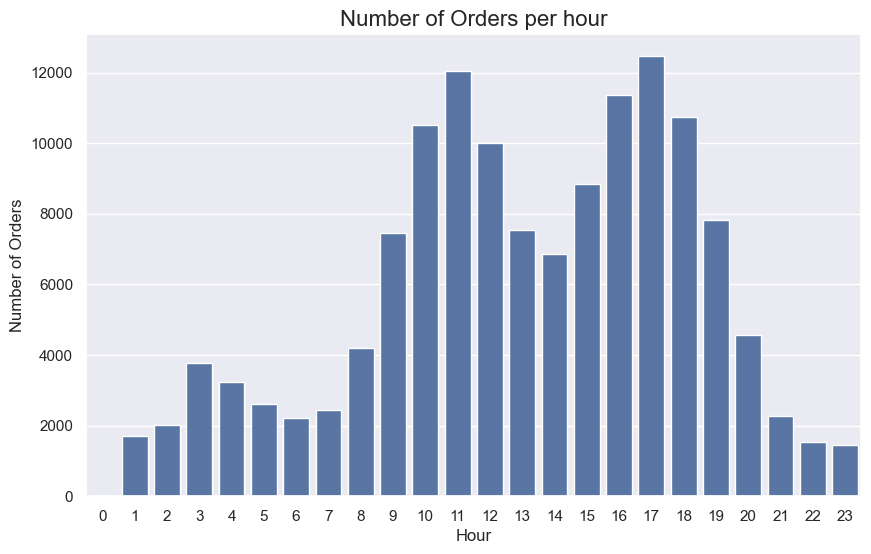

In [1077]:
# Sum the values for each day of the week
hr_plot = df[hr_columns].sum()

# Create a new DataFrame for visualization
hr_counts = pd.DataFrame({
    'Hour': hr_values,
    'Number of Orders': hr_plot.values
})

# Create a count plot (using barplot here since we already have aggregated data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Number of Orders', data=hr_counts)

# Set the title and labels
plt.title('Number of Orders per hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
#plt.xticks(rotation=90)  # Rotate x-tick labels if needed

# Show the plot
plt.show()


### how to shape of frequency changes per day 
#### podzielic to na pory dsnia  

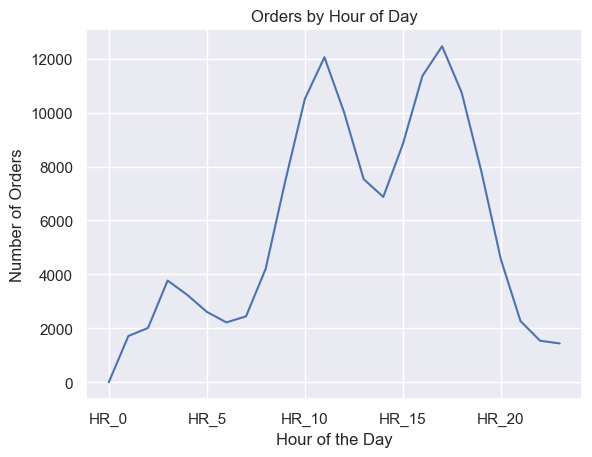

In [1078]:
# Plot showing how cutomers buy during a day in different hours 
df[hr_columns].sum().plot()

plt.title('Orders by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()


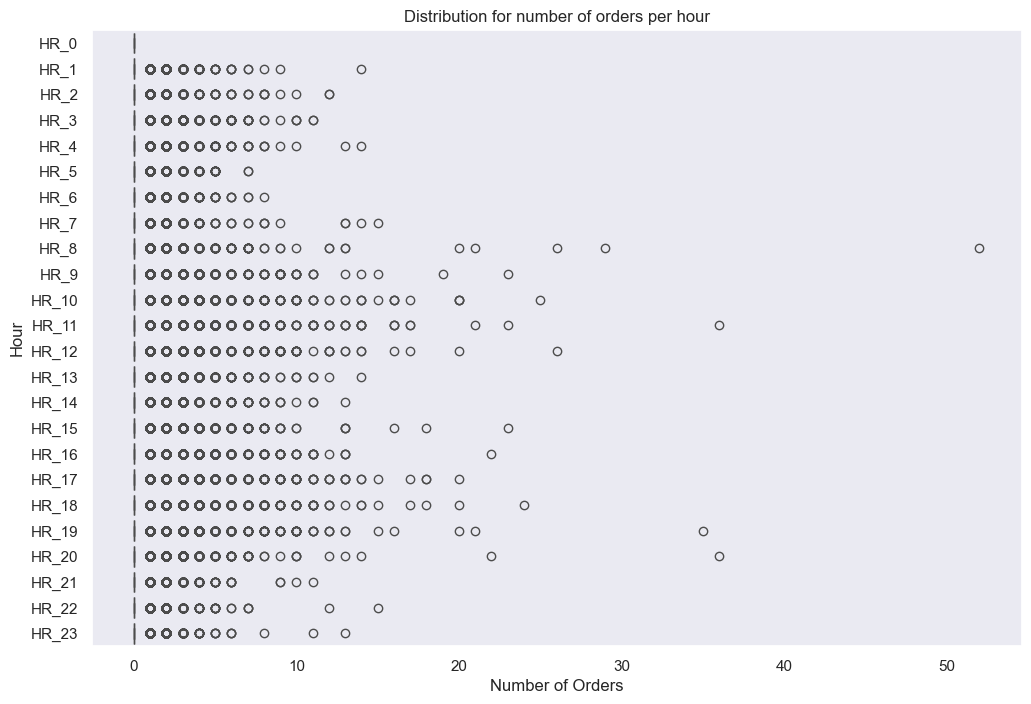

In [1079]:
df_melted = df.melt(value_vars=hr_columns, var_name='Hour', value_name='Number of Orders')

# Create a transposed box plot
plt.figure(figsize=(12, 8))
sns.boxplot(y='Hour', x='Number of Orders', data=df_melted)

plt.title('Distribution for number of orders per hour')
plt.grid(axis='x') 
# plt.xticks(rotation=90) 
plt.show()



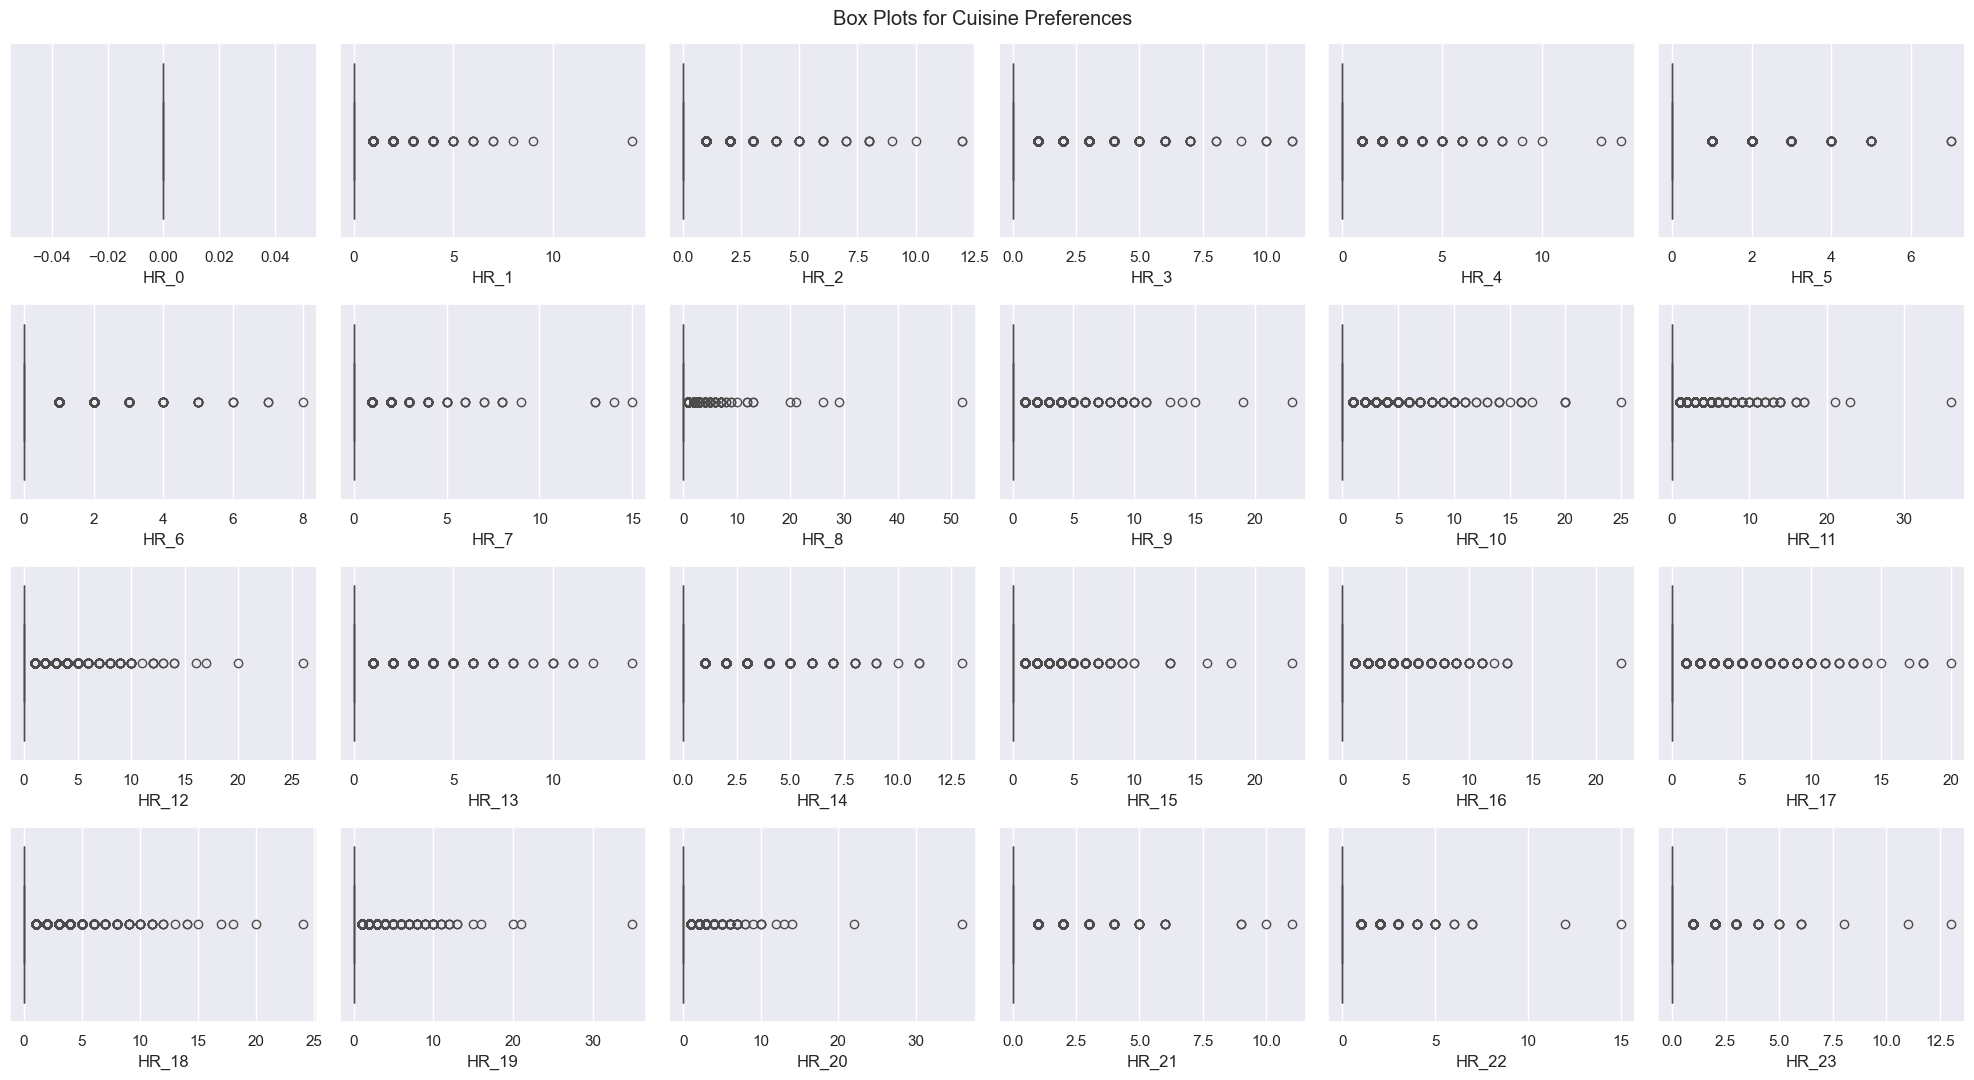

In [1080]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 4
sp_cols = math.ceil(len(hr_columns) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), df[hr_columns]): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Box Plots for Cuisine Preferences"

plt.suptitle(title)

# if not os.path.exists(os.path.join('..', 'figures', 'eda')):
#     # if the eda directory is not present then create it first
#     os.makedirs(os.path.join('..', 'figures', 'eda'))


# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [1081]:
outliers_info = {}

for column in hr_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    low_outlier = df[column] < (Q1 - 1.5 * IQR)
    high_outlier = df[column] > (Q3 + 1.5 * IQR)
    outliers = df[low_outlier | high_outlier]
   
    num_outliers = outliers.shape[0]
    total_values = df[column].shape[0]
    
    percentage_share = round((num_outliers / total_values) * 100,2) 
    
   
    outliers_info[column] = {
        'Count of Outliers': num_outliers,
        'Percentage Share of Outliers': percentage_share
    }


#Create a DataFrame from the dictionary
outliers_df = pd.DataFrame(outliers_info).T  # Transpose to get cuisines as rows not columns
outliers_df.reset_index(inplace=True)
outliers_df.rename(columns={'index': 'Hour'}, inplace=True)
outliers_df = outliers_df.sort_values(by='Count of Outliers', ascending=False)

print(outliers_df)

     Hour  Count of Outliers  Percentage Share of Outliers
17  HR_17             7614.0                         23.89
11  HR_11             7530.0                         23.62
16  HR_16             7143.0                         22.41
18  HR_18             6691.0                         20.99
10  HR_10             6598.0                         20.70
12  HR_12             6497.0                         20.38
15  HR_15             6038.0                         18.94
13  HR_13             5454.0                         17.11
14  HR_14             5104.0                         16.01
9    HR_9             4923.0                         15.44
19  HR_19             4891.0                         15.34
20  HR_20             3068.0                          9.63
8    HR_8             2952.0                          9.26
3    HR_3             2521.0                          7.91
4    HR_4             2368.0                          7.43
5    HR_5             2026.0                          6.

---

### **`Mariana Variables`**

---

<div class="alert alert-block alert-info" style="font-size:16px">

## 1.2 Feature engineering

### **`Client_activity_flag`**


In [1082]:
"""
Defining 3 categories
1. Inactive users (When the 'last_order' was made in the last month)
2. Active users ((When the 'last_order' was made in the first 2 months)
3. One time customers (When the first_order == last_order)
"""

"\nDefining 3 categories\n1. Inactive users (When the 'last_order' was made in the last month)\n2. Active users ((When the 'last_order' was made in the first 2 months)\n3. One time customers (When the first_order == last_order)\n"

In [1083]:
"""Tried creating the new feature without removing 'first_order' NaN values. IT DIDN'T WORK (will result in error) """

"""
conditions = [
    (df['first_order'] == df["last_order"]),
    (df['last_order'] >= 60),                
    (df['last_order']< 60)            
]

choices = ['one_time_customer', 'active' , 'inactive']


df['client_activity_flag'] = np.select(conditions, choices, default='0')
df['client_activity_flag'].unique()

"""

'\nconditions = [\n    (df[\'first_order\'] == df["last_order"]),\n    (df[\'last_order\'] >= 60),                \n    (df[\'last_order\']< 60)            \n]\n\nchoices = [\'one_time_customer\', \'active\' , \'inactive\']\n\n\ndf[\'client_activity_flag\'] = np.select(conditions, choices, default=\'0\')\ndf[\'client_activity_flag\'].unique()\n\n'

In [1084]:
"""Created a new DataFrame called df_without_fo_na after removing the first_order NaN values. Used it to create new feature"""

df_without_fo_na= df.dropna(subset="first_order")
conditions = [
    (df_without_fo_na['first_order'] == df_without_fo_na["last_order"]),
    (df_without_fo_na['last_order'] >= 60),                
    (df_without_fo_na['last_order']< 60)            
]

choices = ['one_time_customer', 'active' , 'inactive']

df_without_fo_na['client_activity_flag'] = np.select(conditions, choices, default='0')

In [1085]:
"""Understanding the feature"""
df_without_fo_na["client_activity_flag"].info()

<class 'pandas.core.series.Series'>
Index: 31769 entries, 0 to 31781
Series name: client_activity_flag
Non-Null Count  Dtype 
--------------  ----- 
31769 non-null  object
dtypes: object(1)
memory usage: 496.4+ KB


In [1086]:
"""Undestanding the statistical properties"""
df_without_fo_na["client_activity_flag"].describe(percentiles= np.arange(0.1,1,0.05))

count      31769
unique         3
top       active
freq       18191
Name: client_activity_flag, dtype: object

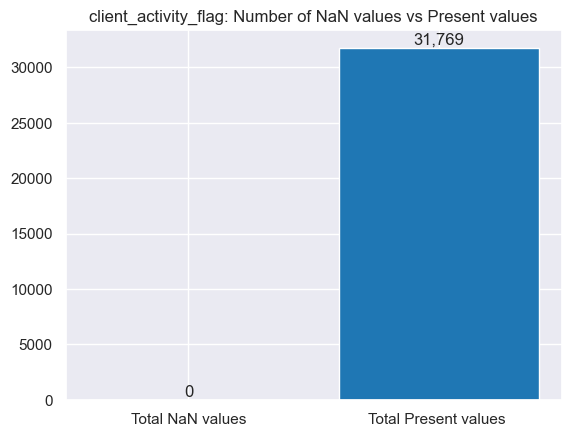

In [1087]:
"""Number of NaN values vs Non missing values"""
total_elements = len(df_without_fo_na["client_activity_flag"])
caf_perc_na_values = df_without_fo_na["client_activity_flag"].isna().sum()
caf_per_present_values = total_elements- fo_perc_na_values

fig, ax = plt.subplots()
x_values = ["Total NaN values", "Total Present values "]
bar_colours = ["tab:green", "tab:blue"]

y_values = [caf_perc_na_values, caf_per_present_values]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [f"{element:,}" for element in y_values])
ax.set_title("client_activity_flag: Number of NaN values vs Present values")

plt.show()


In [1088]:
"""Attempting to understand the NaN values better"""
# NO NaN values

'Attempting to understand the NaN values better'

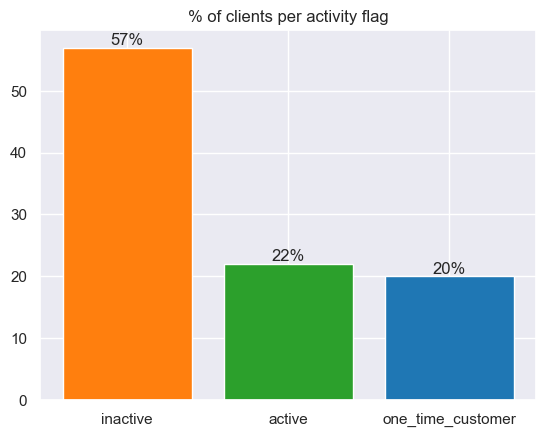

In [1089]:
"""Bar plot"""
x_values = list(df_without_fo_na["client_activity_flag"].unique())
y_values = df_without_fo_na["client_activity_flag"].value_counts()

total_elements = df_without_fo_na["client_activity_flag"].count()
y_values = [int((element/total_elements)*100) for element in y_values]

fig, ax = plt.subplots()
bar_color = ["tab:orange", "tab:green", "tab:blue"]
p = ax.bar(x_values, y_values, color= bar_color)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("% of clients per activity flag")

plt.show()

#### <u> Conclusions </u> 
- The majority of our clients are considered 'inactive' (57%)

### Key Notes on 'client_activity_flag'
- Represents a categorical feature
- Visually doesn't seem to have outliers
- No strange values
- No NaN valuea after removing 'first_order' NaN values
- Preprocessing activites: removed 'first_order' NaN values
- Didn't change the dtype 

---

### **`Total_orders_per_client`**

#### - Using DOW_0 to DOW_6. Regarding the possibility of analyzing HR_0 to HR_23 please check topic 1.3 Analyzing NaN values

---

<div class="alert alert-block alert-info" style="font-size:16px">

## 1.3 Analyzing NaN values

### **`HR_0`**
#### - Using DOW_0 to DOW_6 vs HR_0 to HR_23 to determine total num of orders

### Notes
- We are formulating the hypothesis that the total num of orders calculated by summing all the values from DOW_0 to DOW_6 and from HR_0 to HR_23 must be the same.
- From all the features, only HR_0 has NaN values, maning that if there is a discrepancy they might be the cause of it
- We expect the total_orders calculated with DOW to be higher than the total_orders calculated using HR. If this happens, than it further verifies that we can input the HR_0 NaN values in the following way:
    - HR_0 NaN value client = total_orders_Dow for client - total_orders_HR for client

In [1090]:
"""Remove warnings"""
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

columns = [element for element in df.columns if "DOW" in str(element) or "HR" in str(element)]
df_HR_DOW = df[columns]

columns_to_sum = [f'DOW_{i}' for i in range(7)]
df_HR_DOW.insert(7, "total_orders_DOW", df[columns_to_sum].sum(axis=1) )

columns_to_sum = [f'HR_{i}' for i in range(24)]
df_HR_DOW["total_orders_HR"] = df[columns_to_sum].sum(axis=1).astype(int)
df_HR_DOW

total_ord_diff = df_HR_DOW.loc[df_HR_DOW["total_orders_DOW"] != df_HR_DOW["total_orders_HR"] ]
total_is_dif_HR_is_NaN = df_HR_DOW.loc[ (df_HR_DOW["total_orders_DOW"] != df_HR_DOW["total_orders_HR"]) & (df_HR_DOW["HR_0"].isnull()) & (df_HR_DOW["total_orders_HR"] < df_HR_DOW["total_orders_DOW"]) ]


if total_is_dif_HR_is_NaN.shape[0] == total_ord_diff.shape[0]:
    print("All the clients whose total number of observations is different when summing all DOW's or HR's are also the ones with NaN values for HR_0 and the total value is always higher in total DOW than HR\n")
    print("This means we can input the values")

#making copy of the column to then input the values
df_HR_DOW.insert(9, "HR_0_corrected", df_HR_DOW["HR_0"])
#Correct values to input HR_0 NaN
values_HR_0_corrected = total_ord_diff["total_orders_DOW"] - total_ord_diff["total_orders_HR"]
df_HR_DOW.fillna({"HR_0_corrected": values_HR_0_corrected}, inplace=True)
df_HR_DOW

All the clients whose total number of observations is different when summing all DOW's or HR's are also the ones with NaN values for HR_0 and the total value is always higher in total DOW than HR

This means we can input the values


,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,total_orders_DOW,HR_0,HR_0_corrected,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,total_orders_HR
0,1,0,0,0,0,0,1,2,0.0,0.0,...,0,0,0,2,0,0,0,0,0,2
1,1,0,0,0,0,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,0,0,0,0,0,0,1,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
31884,0,0,0,0,0,0,1,1,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
31885,0,0,0,0,0,0,1,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
31886,0,0,0,0,0,0,1,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


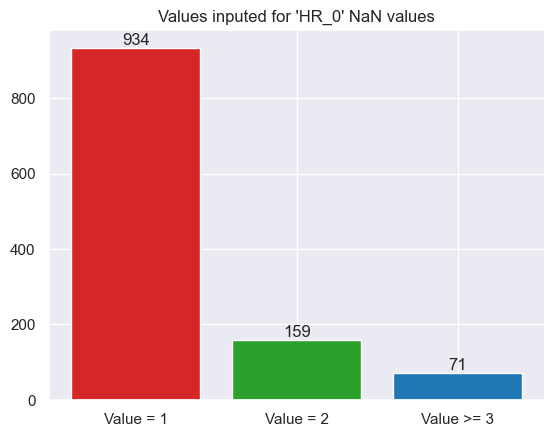

Total values inputed 1164
Number of HR_0 NaN values: 1164


In [1091]:
"""Bar plot"""
HR_0_input_values = df_HR_DOW.loc[df_HR_DOW["HR_0"].isna(), "HR_0_corrected"]
values_1_inputed = HR_0_input_values.loc[HR_0_input_values == 1].count()
values_2_inputed = HR_0_input_values.loc[HR_0_input_values == 2].count()
values_3_inputed = HR_0_input_values.loc[HR_0_input_values >= 3].count()

y_values = [values_1_inputed, values_2_inputed, values_3_inputed]

x_values = ["Value = 1", "Value = 2", "Value >= 3"]
fig, ax = plt.subplots()
bar_color = ["tab:red", "tab:green", "tab:blue"]
p = ax.bar(x_values, y_values, color= bar_color)
ax.bar_label(p, labels= [str(element) for element in y_values])
ax.set_title("Values inputed for 'HR_0' NaN values")
plt.show()

HR_0_Nan = df["HR_0"].isnull().sum()
print(f"Total values inputed {values_1_inputed+values_2_inputed+values_3_inputed}")
print(f"Number of HR_0 NaN values: {HR_0_Nan}") 


<div class="alert alert-block alert-warning">
<b style="font-size: 2em">Note:</b> Now we need to check wheter the total number of orders made by all clients is equal using DOW and HR variables after inputting the 'HR_0' NaN values.

</div>



In [1092]:
#Insert corrected column
df.insert(34, "HR_0_corrected", df["HR_0"])

# Determine correct values to input NaN HR_0 and replace them in the corrected column
df.fillna({"HR_0_corrected": values_HR_0_corrected}, inplace=True)

In [1093]:
columns_HR = [element for element in df.columns if "HR" in str(element)]
columns_HR.remove("HR_0")
columns_DOW = [element for element in df.columns if "DOW" in str(element)]

HR_total_orders_dataset = int(df[columns_HR].sum().sum())
DOW_total_orders_dataset = int(df[columns_DOW].sum().sum())

print(f"{columns_HR} \n")
print(f"Total number of orders of all clients using HR (used HR_0 instead of HR) is: {HR_total_orders_dataset:,}")
print(f"Total number of orders of all clients using DOW is: {DOW_total_orders_dataset:,}")


['HR_0_corrected', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'] 

Total number of orders of all clients using HR (used HR_0 instead of HR) is: 139,263
Total number of orders of all clients using DOW is: 139,263


---

### **`first_order`**

In [1094]:
## TO DO JOão

---

<div class="alert alert-block alert-info" style="font-size:16px">

### Key notes **`HR_0`**
1. All the NaN values present in HR_0 can be determined 
2. For each client, the 'HR_0' NaN value corresponds to the difference between the client's total number of orders using 'DOW' and total number of orders using 'HR'
3. After creating the column 'HR_0_corrected' where all the NaN values where substitued by their correct values, we can see that the total number of orders in the dataset using the HR variables or the DOW variables is the same

### Key notes **`first_order`**

## **`Hey Mia, suggestion to write here :)`**


<div class="alert alert-block alert-info" style="font-size:16px">

## 1.4 Multivariate relationships

In [1095]:
"""Spliting features into categorical and non categorical data"""
cat_features = df[["customer_region", "last_promo", "payment_method", "payment_method_combined", "city"]]
num_features = df.set_index("customer_id").drop(columns=cat_features)
num_features


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.0,2,5,1,0,1,0.00,0.00,0.00,0.0,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,17.0,2,2,2,0,1,12.82,6.39,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,38.0,1,2,2,0,1,9.20,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,NaN,2,3,1,0,2,0.00,13.70,0.00,0.0,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,20.0,2,5,0,0,2,14.57,40.87,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,30.0,1,1,1,<NA>,0,0.00,0.00,18.04,0.0,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,NaN,1,1,0,<NA>,0,18.04,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,24.0,1,1,1,<NA>,0,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info" style="font-size:16px">

### a) Analyzing Numerical features

### **`Spearman Correlation matrix`**

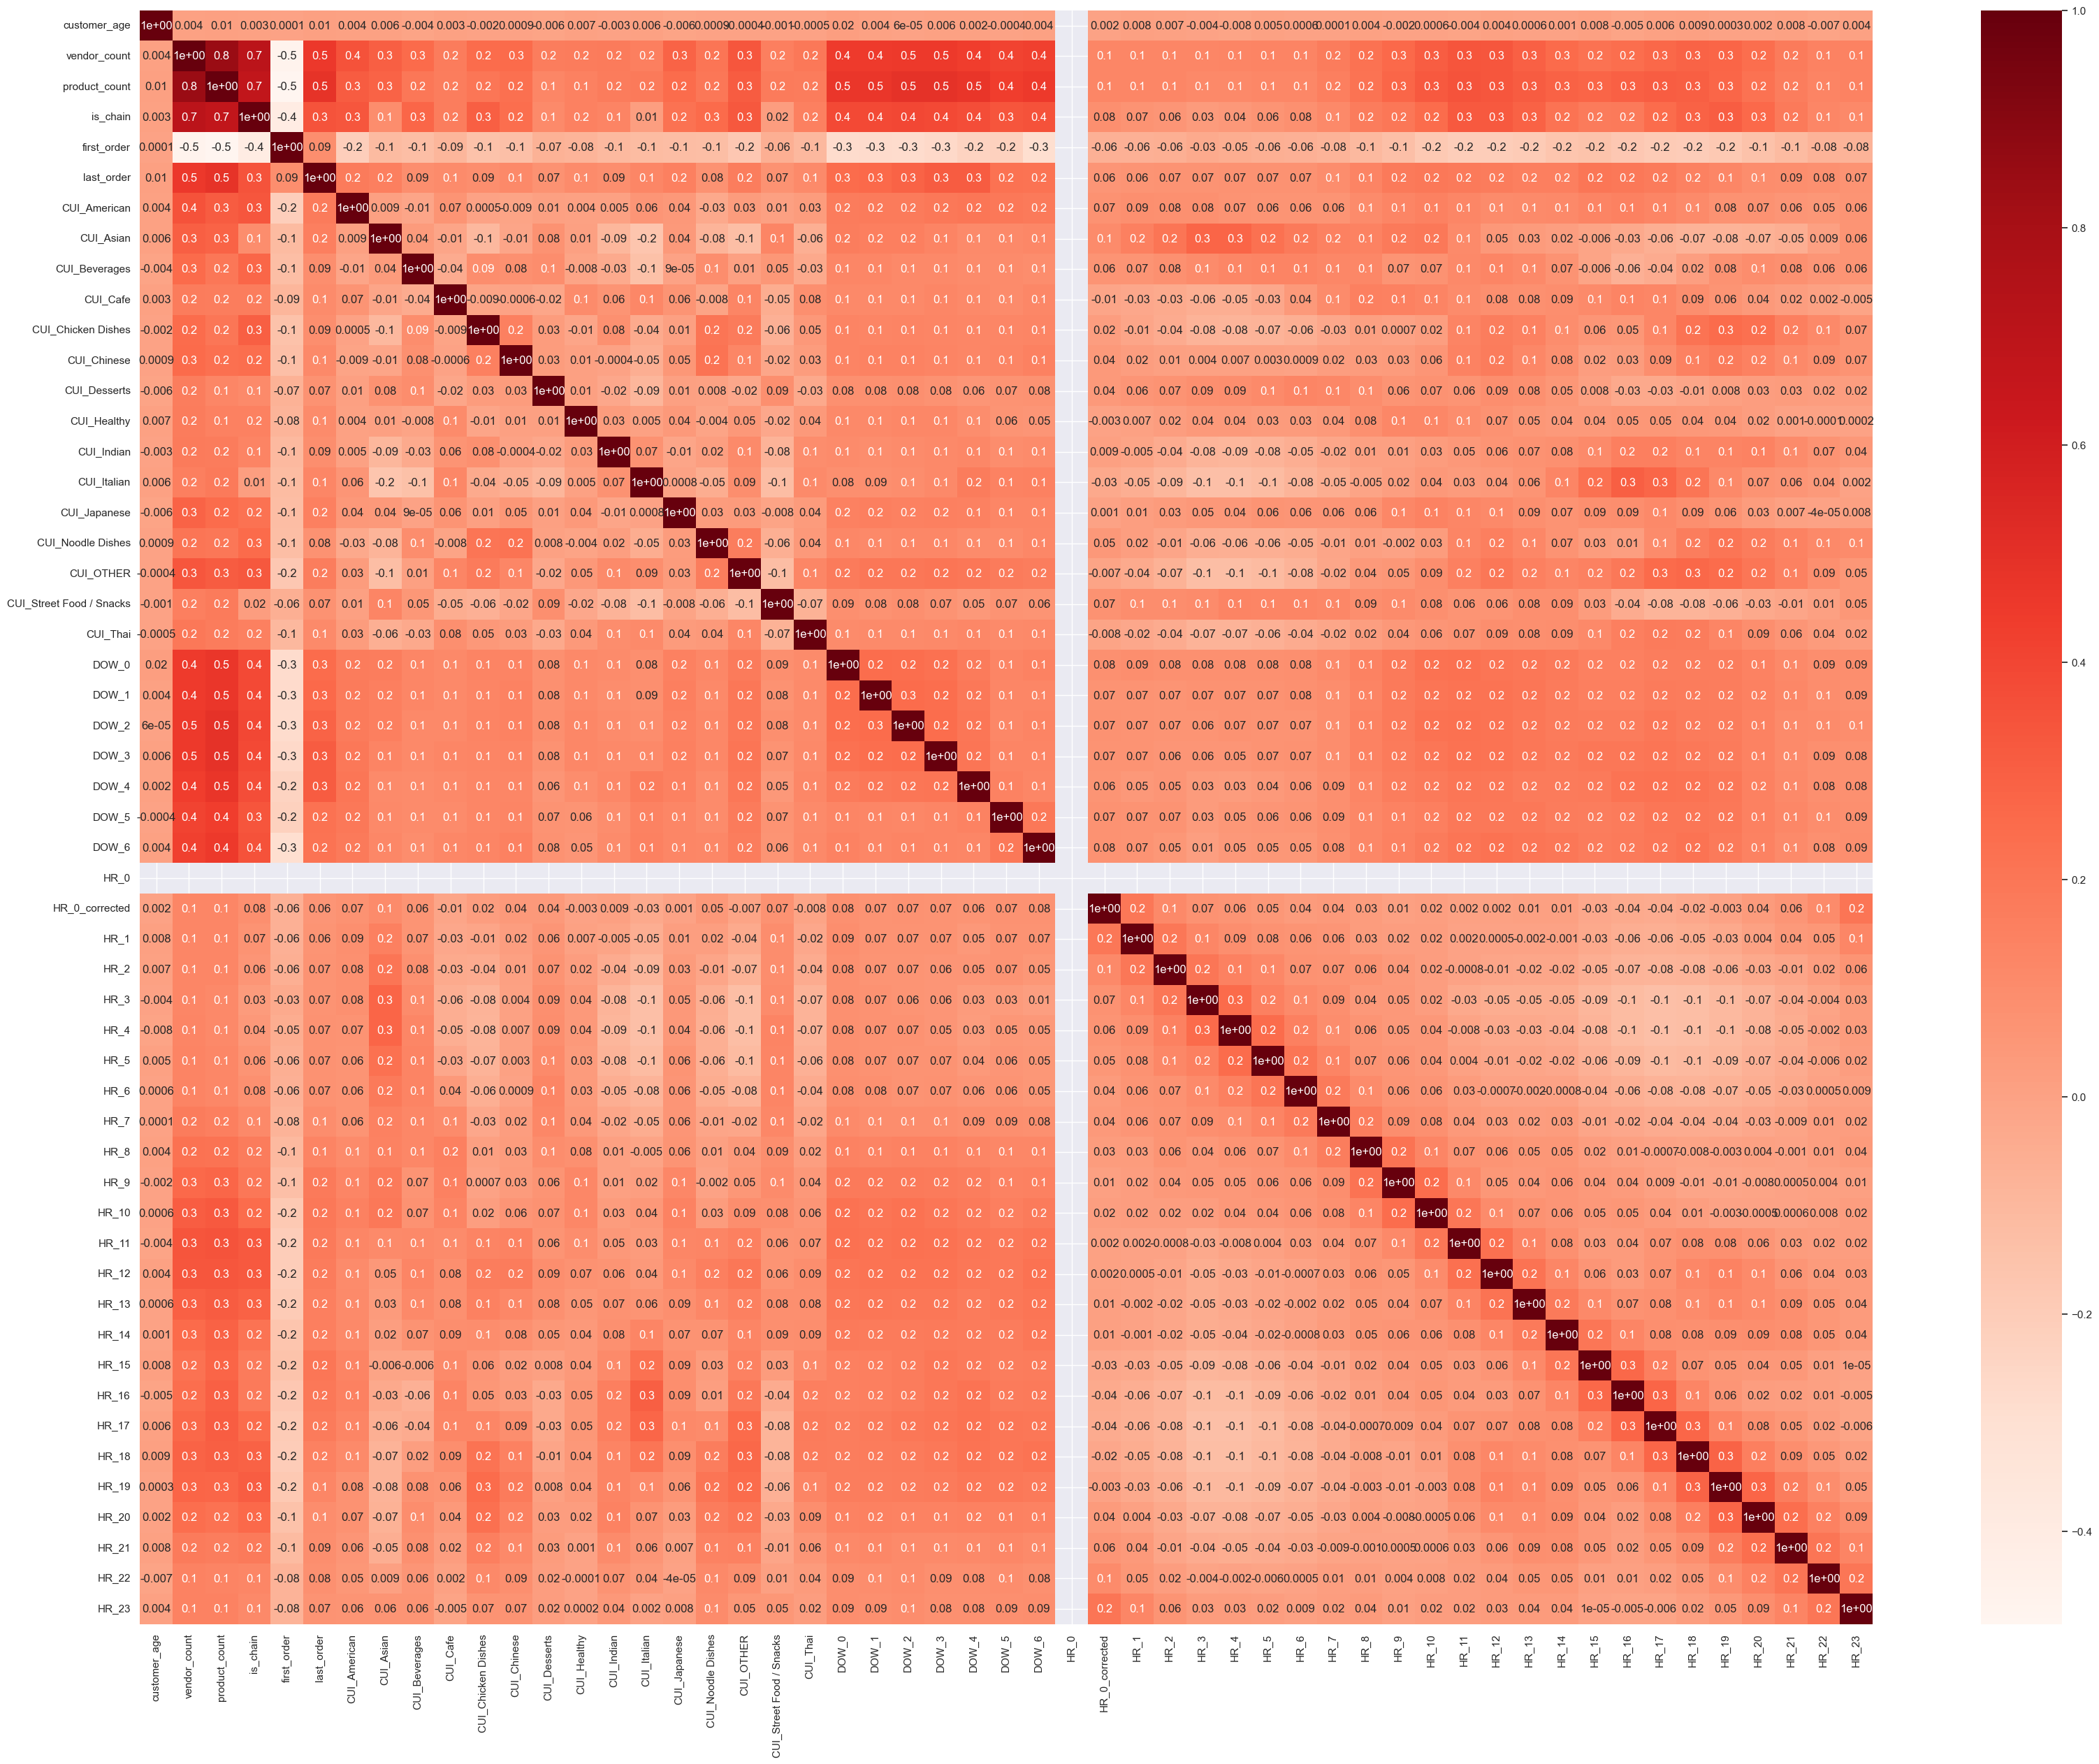

In [1096]:
"""Numerical features: Analyzing feature redundancy (Spearman Correlation matrix)"""
def cor_heatmap(cor):
    plt.figure(figsize=(40,30))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.0')
    plt.show()

cor_spearman = num_features.corr(method ='spearman')
cor_heatmap(cor_spearman)

### Key Notes on Spearman Correlation Matrix
- Since 'HR_0' values are always 0 or NaN, we can't compute it's correlation metric with the remaining features
- 'product_count' and 'vendor_count' are highly postively correlated (0.8).
- 'is_chain' highly positively correlated with 'product_count' and 'vendor_count' (0.7).
- All 'DOW' features are moderately correlated with 'vendor_count', 'product_count' and 'is_chain' (between 0.3 and 0.5)
-  'last_order' with 'vendor_count' and 'product_count' (0.5)
- All other correlation values are quite negligible 

---

### **`All numerical features pair plots`** Uncomment if you want to wait 10 min :)

In [1097]:
"""Identifying 2-dimensional outliers (All scatter plots)"""

"""
sns.set()

sns.pairplot(num_features, diag_kind="hist")

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'Project', 'figures')):
    os.makedirs(os.path.join('..', 'Project', 'figures'))
    
plt.savefig(os.path.join('..', 'Project', 'figures', 'all numer features scatter plots.png'), dpi=200)

"""


'\nsns.set()\n\nsns.pairplot(num_features, diag_kind="hist")\n\nplt.subplots_adjust(top=0.95)\nplt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)\n\n# if the eda directory is not present then create it first\nif not os.path.exists(os.path.join(\'..\', \'Project\', \'figures\')):\n    os.makedirs(os.path.join(\'..\', \'Project\', \'figures\'))\n    \nplt.savefig(os.path.join(\'..\', \'Project\', \'figures\', \'all numer features scatter plots.png\'), dpi=200)\n\n'

### Key Notes

### - Each of us analyzes the rows corresponding to the features we got attributed?

<div class="alert alert-block alert-info" style="font-size:16px">

### b) Analyzing categorical features

### **`Cramer's V correlation`**

### Analyzing feature redundancy

> To calculate the correlation between two categorical variables, we will use the **Cramer's V correlation**.

#### **Cramer's V Correlation** <sup>[4]</sup>

A possible effect size for the very first test we did (the omnibus test known as Pearson Chi-square test) is Cramér's V (Cramér, 1946). This measure is actually designed for the chi-square test for independence but can be adjusted for the goodness-of-fit test (Kelley & Preacher, 2012, p. 145; Mangiafico, 2016, p. 474) <sup>[5]</sup><sup>[6]</sup>. It gives an estimate of how well the data then fits the expected values, where 0 would indicate that they are exactly equal. If you use the equal distributed expected values (as we did in the example) the maximum value would be 1, otherwise it could actually also exceed 1.

|Cohen w| Interpretation|
|-------|---------------|
|0 < .10| Negligible|
|0.10 < 0.30 |Small|
|0.30 < 0.50| Medium|
|0.50 or more| Large|

<br>


In [1098]:
# Calculate the Cramer's V correlation matrix
# Source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

def cramers_v_bias_correction(var1,var2):

    """
    Calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    contingency_table = pd.crosstab(var1,var2).values
    chi2 = ss.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((k_corrected-1), (r_corrected-1)))

# Building of the matrix
cramers_rows= []

for feature_1 in cat_features.columns:
  cramers_col = []
  for feature_2 in cat_features.columns:
    cramers = cramers_v_bias_correction(cat_features[feature_1], cat_features[feature_2]) # Cramer's V test
    cramers_col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  cramers_rows.append(cramers_col)

cramers_matrix = np.array(cramers_rows)
cramers_matrix_df = pd.DataFrame(cramers_matrix, columns = cat_features.columns, index = cat_features.columns)
cramers_matrix_df

,customer_region,last_promo,payment_method,payment_method_combined,city
customer_region,1.00,0.05,0.05,0.05,1.00
last_promo,0.05,1.00,0.09,0.05,0.07
payment_method,0.05,0.09,1.00,1.00,0.05
payment_method_combined,0.05,0.05,1.00,1.00,0.05
city,1.00,0.07,0.05,0.05,1.00


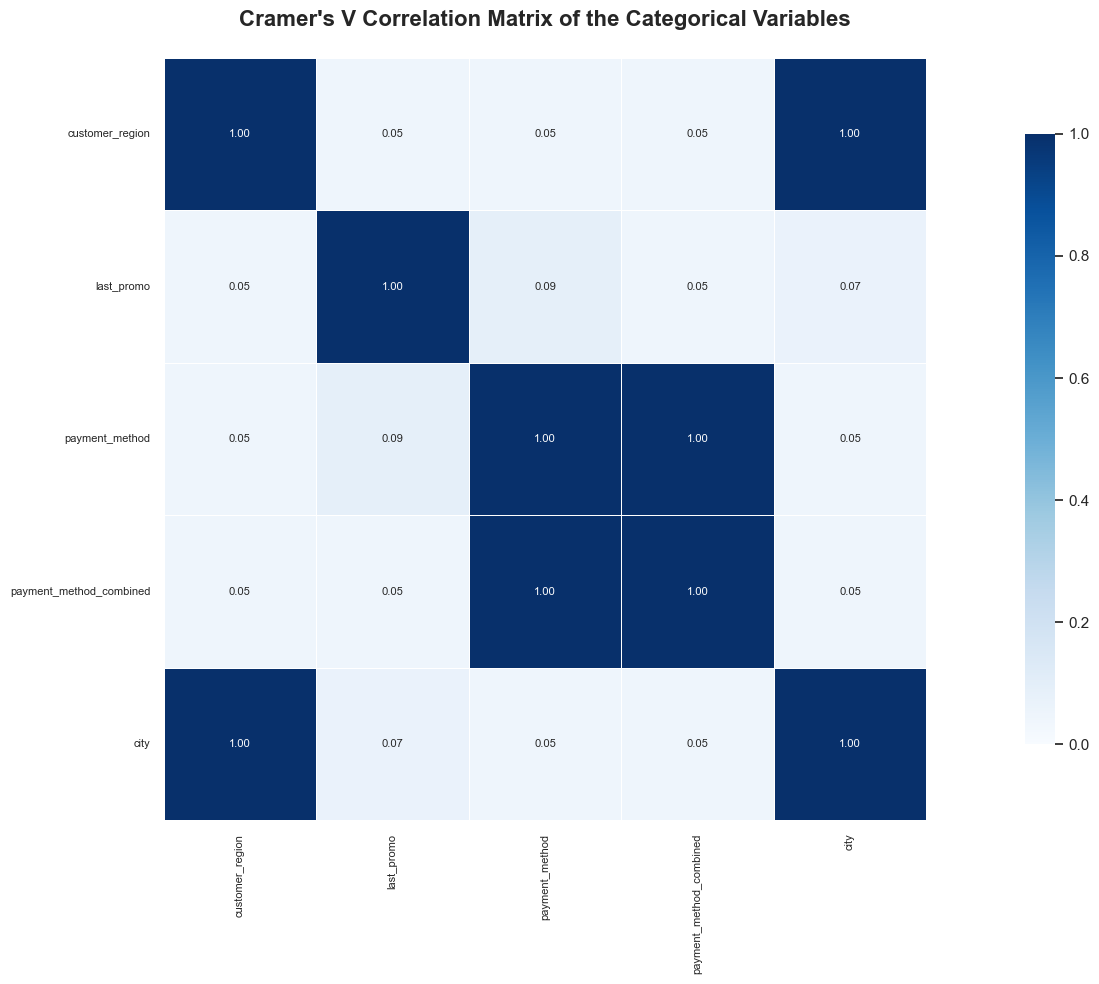

In [1099]:
# Heatmap of the Cramer's V correlation matrix

# Plot the correlation matrix as a Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cramers_matrix_df,
            cmap='Blues',
            annot=True,    # Annotate all cells
            fmt='.2f',     # Display annotations as float numbers rounded to 2 decimal places
            annot_kws={'fontsize':8},
            cbar_kws={'shrink':0.8},
            vmin=0, vmax=1, center=0.5,
            linewidths=0.5, square=True)
plt.title("Cramer's V Correlation Matrix of the Categorical Variables\n", fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks=np.arange(len(cramers_matrix_df.columns)) + 0.5, # Center the ticks
           labels=cramers_matrix_df.columns,
           fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



### Key notes

#### - Al the categorical features have very low low Crammers V values.
#### - This means that the association between them is very low

---

### **`Categorical variables pairs`**

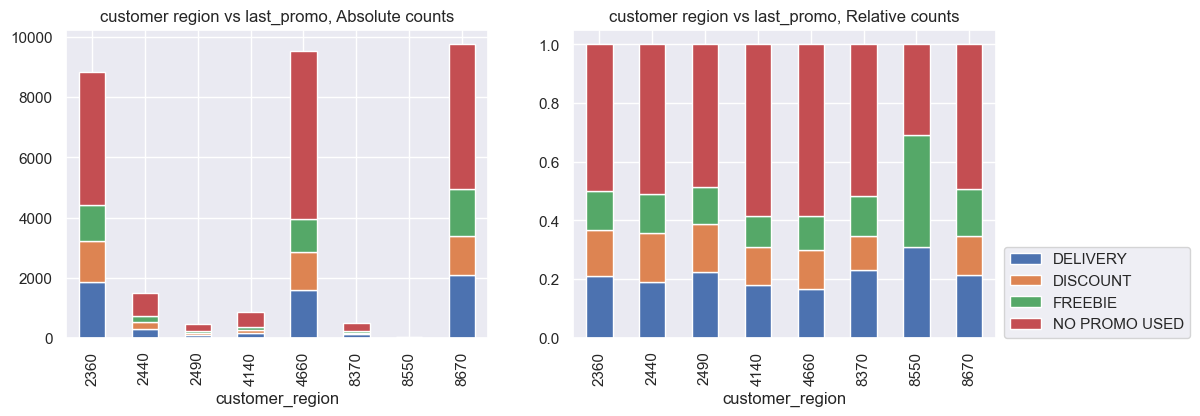

In [1100]:
"""Categorical features: Analyzing pairs of categorical features with stacked bar plots"""

""" 1.0 'Customer_region' and 'last_promo' """

cat1 = 'customer_region'
cat2 = 'last_promo'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('customer region vs last_promo, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('customer region vs last_promo, Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()


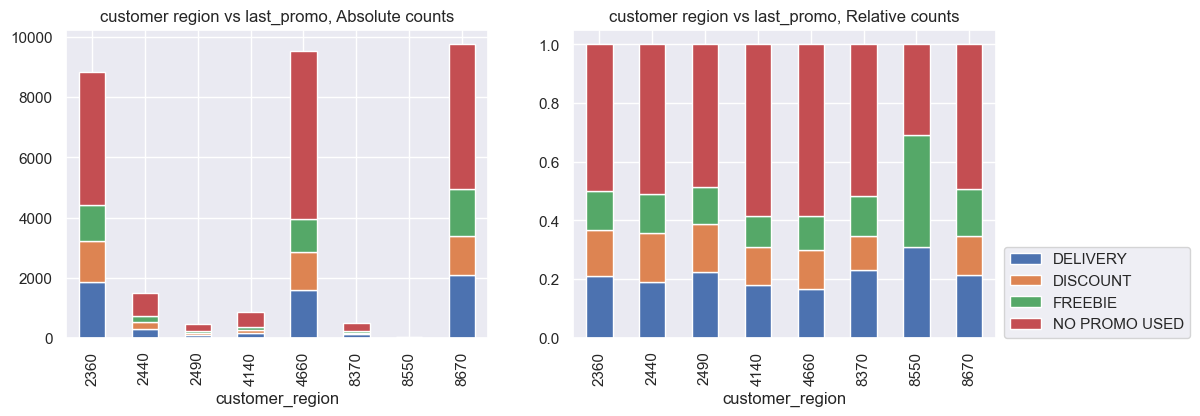

In [1101]:
""" 1.1 'customer_region' and 'last_promo' after preprocessing 'customer_region' (removed value '-')  """
cat_features = cat_features.loc[cat_features["customer_region"] != '-']

cat1 = 'customer_region'
cat2 = 'last_promo'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = cat_features.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('customer region vs last_promo, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot

catpc_df2 = cat_features.groupby([cat1, cat2])[cat2].size() / cat_features.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('customer region vs last_promo, Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()

### Key Notes
- 'No promo used' is the dominant category in all regions with the exception of a single region ('8550').
- In relative terms, Region 8550 has 2 important aspects to note:
    - First, promo code 'DISCOUNT' was never used
    - Second, it has the highest percentage of discounts used (highest % of 'FREEBIE' and highest % 'DELIVERY')

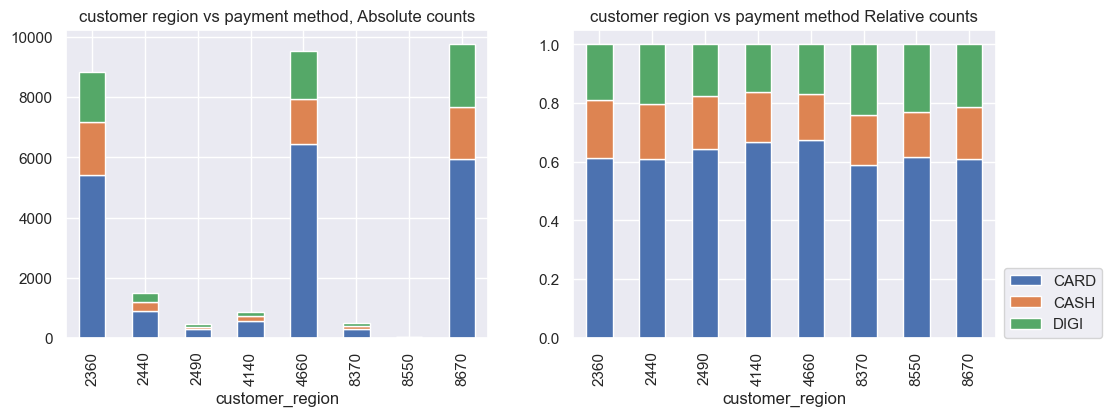

In [1102]:
""" 2. 'customer_region' and 'payment_method' after preprocessing 'customer_region' (removed value '-')  """

cat1 = 'customer_region'
cat2 = 'payment_method'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = cat_features.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('customer region vs payment method, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot

catpc_df2 = cat_features.groupby([cat1, cat2])[cat2].size() / cat_features.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('customer region vs payment method Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()

### Key Notes
- No matter if the region belongs to the most or least populated areas of the cities, the relative counts for each payment method category remain unchanged from region to region
- payment method doesn't not a good feature to distinguish customer regions

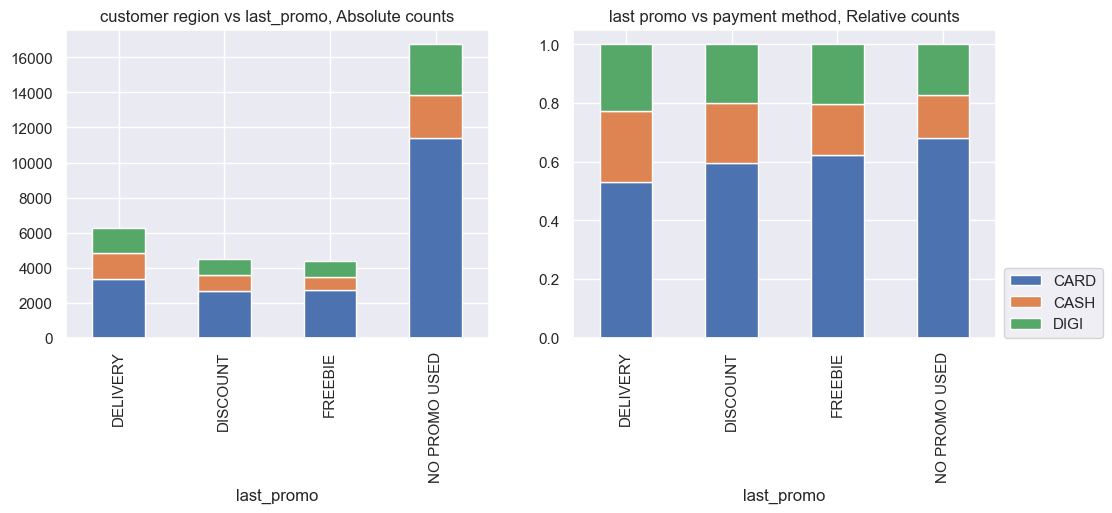

In [1103]:
""" 3. 'last_promo' and 'payment_method' after preprocessing 'customer_region' (removed value '-')  """

cat1 = 'last_promo'
cat2 = 'payment_method'

fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = cat_features.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('customer region vs last_promo, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot

catpc_df2 = cat_features.groupby([cat1, cat2])[cat2].size() / cat_features.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('last promo vs payment method, Relative counts')
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot

plt.show()

<div class="alert alert-block alert-info" style="font-size:16px">

### c) Analyzing categorical vs numerical features

### **`Pair Plot of Numerical Features with Grouping by categorical feature`** Uncomment if you want to wait 20 min :)

In [1104]:
"""Pair plots with x and y numerical with hue= 'customer_region'  """

"""
sns.set()
num_features_cols = list(num_features.columns)

# Setting pairplot
sns.pairplot(df[num_features_cols + ['customer_region']], diag_kind="hist", hue='customer_region')

# Layout
plt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Customer Region", fontsize=20)

plt.show()

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'Project', 'figures')):
    os.makedirs(os.path.join('..', 'Project', 'figures'))
    
plt.savefig(os.path.join('..', 'Project', 'figures', 'Pairwise Relationships Between num features, Colored by Customer Region.png'), dpi=200)
"""

'\nsns.set()\nnum_features_cols = list(num_features.columns)\n\n# Setting pairplot\nsns.pairplot(df[num_features_cols + [\'customer_region\']], diag_kind="hist", hue=\'customer_region\')\n\n# Layout\nplt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Customer Region", fontsize=20)\n\nplt.show()\n\n# if the eda directory is not present then create it first\nif not os.path.exists(os.path.join(\'..\', \'Project\', \'figures\')):\n    os.makedirs(os.path.join(\'..\', \'Project\', \'figures\'))\n    \nplt.savefig(os.path.join(\'..\', \'Project\', \'figures\', \'Pairwise Relationships Between num features, Colored by Customer Region.png\'), dpi=200)\n'

In [1105]:
"""Pair plots with x and y numerical with hue= 'last_promo'  """
"""
sns.set()
num_features_cols = list(num_features.columns)

# Setting pairplot
sns.pairplot(df[num_features_cols + ['customer_region']], diag_kind="hist", hue='customer_region')

# Layout
plt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Customer Region", fontsize=20)

plt.show()

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'Project', 'figures')):
    os.makedirs(os.path.join('..', 'Project', 'figures'))
    
plt.savefig(os.path.join('..', 'Project', 'figures', 'Pairwise Relationships Between num features, Colored by Last Promo.png'), dpi=200)
"""

'\nsns.set()\nnum_features_cols = list(num_features.columns)\n\n# Setting pairplot\nsns.pairplot(df[num_features_cols + [\'customer_region\']], diag_kind="hist", hue=\'customer_region\')\n\n# Layout\nplt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Customer Region", fontsize=20)\n\nplt.show()\n\n# if the eda directory is not present then create it first\nif not os.path.exists(os.path.join(\'..\', \'Project\', \'figures\')):\n    os.makedirs(os.path.join(\'..\', \'Project\', \'figures\'))\n    \nplt.savefig(os.path.join(\'..\', \'Project\', \'figures\', \'Pairwise Relationships Between num features, Colored by Last Promo.png\'), dpi=200)\n'

In [1106]:
"""Pair plots with x and y numerical with hue= 'payment method'  """
"""
sns.set()
num_features_cols = list(num_features.columns)

# Setting pairplot
sns.pairplot(df[num_features_cols + ['customer_region']], diag_kind="hist", hue='customer_region')

# Layout
plt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Last Promo", fontsize=20)

plt.show()

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'Project', 'figures')):
    os.makedirs(os.path.join('..', 'Project', 'figures'))
    
plt.savefig(os.path.join('..', 'Project', 'figures', 'Pairwise Relationships Between num features, Colored by Payment Method.png'), dpi=200)
"""

'\nsns.set()\nnum_features_cols = list(num_features.columns)\n\n# Setting pairplot\nsns.pairplot(df[num_features_cols + [\'customer_region\']], diag_kind="hist", hue=\'customer_region\')\n\n# Layout\nplt.suptitle("Pairwise Relationships Between Numerical Features, Colored by Last Promo", fontsize=20)\n\nplt.show()\n\n# if the eda directory is not present then create it first\nif not os.path.exists(os.path.join(\'..\', \'Project\', \'figures\')):\n    os.makedirs(os.path.join(\'..\', \'Project\', \'figures\'))\n    \nplt.savefig(os.path.join(\'..\', \'Project\', \'figures\', \'Pairwise Relationships Between num features, Colored by Payment Method.png\'), dpi=200)\n'